# 01. Preparing Notebook
# 02. Regression Version 1
## 02a. Regression with lot <= 300
## 02b. Regression with Lot > 300
## 02c. Regression with "Year_renovated" => 2015
# 03a. Compare descriptive statistics for Year_renovated <> 2015
# 03b. Compare renovated and not renovated
# 04. Regression Version 2
## 04a. Regression for "Type"
## 04b. Regression with price/m² and building year 1900 - 2020
## 04c. Regression with Year_renovated from 1990-2020
# 05. Dig a little deeper into the new variable Price/m²
# 06. K-means clustering
## 06a. K-means clustering with Price/m²
## 06b. K-means with year_renovated 1990-2020 and all years.
## 06c. Lets cluster year_built and year_renovated
## 06d. K-Means comparison with houses that are not renovated
## 06e. K-means clustering with Type

## 01. Preparing Notebook

In [1]:
# importing libraries for regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
# creating path
path = r'C:\Users\lifti\OneDrive\CareerFoundry\Data Immersion\Achievement6\German Housing Data'

In [4]:
# importing data set
df = pd.read_pickle (os.path.join (path,'02 Data','Prepared Data','germany_housing_no_median_renovation.pkl'))

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
pd.options.display.max_rows = 100

In [19]:
## creating Price/maxm²
df['Price/maxm²'] = df['Price']/df['m²max']

In [20]:
# creating Price/minm²
df['Price/minm²'] = df['Price']/df['m²min']

In [21]:
# creating Price/minm²
df['Price/lsm²'] = df['Price']/df['Living_space']

In [22]:
# creating Price/minm²
df['Price/uam²'] = df['Price']/df['Usable_area']

In [14]:
# It seems that "Living_space" and "Usable_area" are sometimes interchangeable used. Therefor I will create 2 new variables with Max and Min
df['m²max'] = df['Living_space'].where(df['Usable_area'] < df['Living_space'], df['Usable_area'])

In [16]:
# It seems that "Living_space" and "Usable_area" are sometimes interchangeable used. Therefor I will create 2 new variables with Max and Min
df['m²min'] = df['Living_space'].where(df['Usable_area'] > df['Living_space'], df['Usable_area'])

In [26]:
df = df.drop (columns = ['Price/m²'])

In [27]:
df

Price               Type  Living_space     Lot  Usable_area  \
0       498000.0  Multiple dwelling        106.00   229.0         80.0   
1       495000.0  Mid-terrace house        140.93   517.0         20.0   
3       259000.0          Farmhouse        140.00   814.0         80.0   
4       469000.0  Multiple dwelling        115.00   244.0         80.0   
5      1400000.0  Mid-terrace house        310.00   860.0        100.0   
...          ...                ...           ...     ...          ...   
10534    35500.0   Special property         47.00  1400.0         80.0   
10535    38000.0          Farmhouse        110.00   471.0        110.0   
10536   348000.0                NaN        200.00  1610.0        650.0   
10537   472500.0             Duplex        485.00   320.0        135.0   
10538    99000.0             Duplex        300.00   850.0        150.0   

          Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
0              01.10.2020     5.5       3.0        1.0     2.0      2005.0   
1              01.01.2021     6.0       3.0        2.0     2.0      1994.0   
3       nach Vereinbarung     4.0       4.0        2.0     2.0      1900.0   
4                  sofort     4.5       2.0        1.0     2.0      1968.0   
5                  sofort     8.0       4.0        2.0     3.0      1969.0   
...                    ...    ...       ...        ...     ...         ...   
10534              sofort     2.0       1.0        1.0     1.0      1985.0   
10535              sofort     5.0       2.0        1.0     3.0      1900.0   
10536              sofort     7.0       5.0        2.0     2.0      1974.0   
10537              sofort    15.0      11.0        4.0     3.0      1906.0   
10538              sofort    12.0       4.0        4.0     3.0      1833.0   

      Furnishing_quality  Year_renovated    Condition               Heating  \
0                 normal             NaN   modernized       central heating   
1                  basic             NaN   modernized         stove heating   
3                  basic          2000.0  fixer-upper       central heating   
4                refined          2019.0  refurbished       central heating   
5                  basic             NaN   maintained                   NaN   
...                  ...             ...          ...                   ...   
10534            refined             NaN   maintained       central heating   
10535            refined          1995.0  refurbished         stove heating   
10536             normal          1996.0    renovated         stove heating   
10537                NaN          2010.0  fixer-upper         stove heating   
10538             normal          2016.0  fixer-upper  night storage heater   

      Energy_source        Energy_certificate  Energy_certificate_type  \
0              Gas                  available       demand certificate   
1               NaN       not required by law                      NaN   
3            Strom                  available       demand certificate   
4               Öl                  available       demand certificate   
5               Öl                  available  consumption certificate   
...             ...                       ...                      ...   
10534          Gas   available for inspection                      NaN   
10535          Gas   available for inspection                      NaN   
10536           Öl   available for inspection                      NaN   
10537          Gas                  available       demand certificate   
10538          Gas                  available  consumption certificate   

      Energy_efficiency_class              State                   City  \
0                          D   Baden-Württemberg          Bodenseekreis   
1                         NaN  Baden-Württemberg       Konstanz (Kreis)   
3                          G   Baden-Württemberg       Waldshut (Kreis)   
4                          F   Baden-Württember

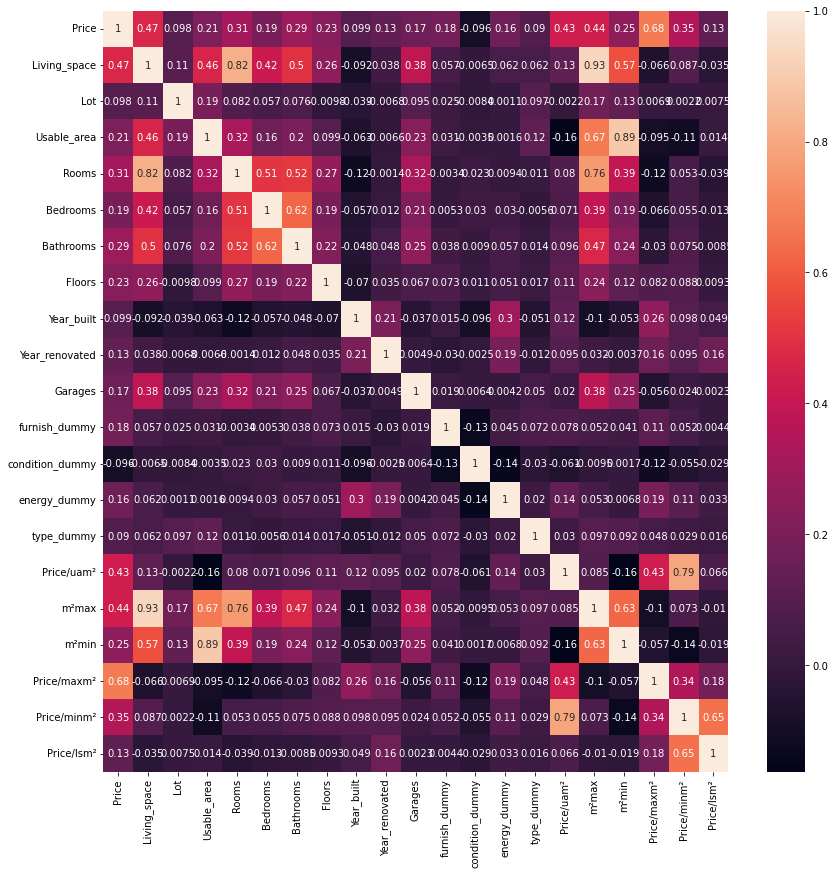

In [28]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df.corr(), annot = True, ax = ax)

In [23]:
df.groupby('Type').agg({'Price': ['count','mean','min','max']}).applymap('{:.0f}'.format)

Price                           
                     count     mean     min       max
Type                                                 
Bungalow               239   872528   28680   6900000
Castle                   7  1185571  149000   2300000
Corner house           177   469612       0   6300000
Duplex                1980   628862       0  11000000
Farmhouse              544   359749       0   1490000
Mid-terrace house     3980   490836       0   8900000
Multiple dwelling      356   414137   25000   1650000
Residential property   351   606136       0   4900000
Single dwelling       1109   453911       0   5575000
Special property       330   462038   12000   1999000
Villa                  362  1492930       0  13000000

In [27]:
df.groupby('Year_renovated').agg({'Price': ['count','mean','min','max']}).applymap('{:.0f}'.format)

Price                            
               count     mean      min       max
Year_renovated                                  
1900.0             1  1500000  1500000   1500000
1917.0             1   189000   189000    189000
1935.0             1    98000    98000     98000
1947.0             1   550000   550000    550000
1950.0             2    86500    75000     98000
1955.0             1   449000   449000    449000
1956.0             3   710000   270000   1590000
1957.0             2    62500        1    125000
1960.0             6   149167    29000    390000
1961.0             2   709500   690000    729000
1965.0             3   370667   125000    498000
1967.0             2   190500    12000    369000
1970.0             9   125278    35000    349000
1971.0             2    69450    69000     69900
1972.0             3   146333    80000    249000
1973.0             2   478750   138500    819000
1974.0             7   477143   160000    890000
1975.0             6   121167    40000    169000
1976.0             3    89500    52000    149500
1977.0             6   390167   259000    529000
1978.0             4   343250    68000    535000
1979.0             5   218800    99000    329000
1980.0            24   305562    16000    965000
1981.0            10   308052    89000    749000
1982.0             5   517000   245000    950000
1983.0             9   629333    69000   2500000
1984.0             6   449667   170000    650000
1985.0            15   595733    59000   2750000
1986.0             9   371611   198000    750000
1987.0             8   325500    90000   1050000
1988.0             9   346111    59000    940000
1989.0             6   341167   119000    680000
1990.0            46   445120    29500   2599000
1991.0            15   395993    95000    920000
1992.0            33   330806    35000   1590000
1993.0            23   320648    59000   1350000
1994.0            49   360110        0   2650000
1995.0            93   319976     7900   2580000
1996.0            57   355296    29500   1690000
1997.0            58   341581    35000   1150000
1998.0            67   402403    12000   3100000
1999.0            57   377732    30300   1380000
2000.0           163   455323        0  10800000
2001.0            65   451558    45000   2600000
2002.0            68   422585        0   1700000
2003.0            59   432707    49900   2650000
2004.0            69   528316        0   2490000
2005.0           102   473509    37800   1800000
2006.0           102   510370        0   3100000
2007.0            71   476304    29000   2900000
2008.0            97   583995        0   3295000
2009.0            93   658639    10000   2689000
2010.0           233   461672        0   2900000
2011.0           108   592489    59000   3200000
2012.0           198   581550    50000   5900000
2013.0           159   559612        0   6500000
2014.0           210   558624    30000   4350000
2015.0           307   572185        0   4900000
2016.0           303   571434        0   3950000
2017.0           390   524069    29990   3200000
2018.0           533   588775        0   6500000
2019.0           630   640514    26000  11000000
2020.0           323   672648        0   5850000
2022.0             1  3700000  3700000   3700000
2026.0             1   439000   439000    439000
2206.0             1   430000   430000    430000

In [28]:
df['Lot'].value_counts (dropna = False )

1000.0     100
800.0       81
300.0       76
500.0       75
600.0       73
          ... 
13000.0      1
83.1         1
3042.0       1
4926.0       1
17600.0      1
Name: Lot, Length: 2463, dtype: int64

In [46]:
# subsetting df_nolot lot <= 300
df_nolot = df.loc[df['Lot']<= 300]

In [47]:
df_nolot['Lot'].value_counts (dropna = False )

300.0    76
200.0    53
250.0    52
150.0    33
290.0    30
         ..
46.0      1
41.0      1
144.8     1
15.0      1
107.0     1
Name: Lot, Length: 299, dtype: int64

In [48]:
df_nolot

Price                  Type  Living_space    Lot  Usable_area  \
0       498000.0     Multiple dwelling        106.00  229.0         80.0   
4       469000.0     Multiple dwelling        115.00  244.0         80.0   
12      475000.0       Single dwelling        124.00  258.0         80.0   
13     1180000.0     Mid-terrace house        217.00  265.0         25.0   
25      430000.0             Farmhouse        115.00  239.0         80.0   
...          ...                   ...           ...    ...          ...   
10502   269000.0     Multiple dwelling         92.00  170.0         92.0   
10503   295000.0                Duplex        492.62  295.0         80.0   
10515    89000.0     Mid-terrace house        160.00  300.0         80.0   
10523   140000.0  Residential property        161.00  287.0        204.0   
10527    80000.0     Mid-terrace house         85.00  219.0        120.0   

       Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
0           01.10.2020     5.5       3.0        1.0     2.0      2005.0   
4               sofort     4.5       2.0        1.0     2.0      1968.0   
12          01.11.2020     5.0       4.0        2.0     2.0      1989.0   
13      nach Absprache     6.5       4.0        2.0     3.0      2017.0   
25              sofort     4.0       4.0        2.0     2.0      1969.0   
...                 ...    ...       ...        ...     ...         ...   
10502       01.09.2020     4.5       3.0        2.0     2.0      1994.0   
10503        vermietet    19.0       4.0        2.0     3.0      1917.0   
10515           sofort     4.0       3.0        3.0     3.0      1969.0   
10523               NaN    6.0       4.0        3.0     2.0      1800.0   
10527        ab sofort     3.0       4.0        1.0     3.0      1900.0   

      Furnishing_quality  Year_renovated         Condition  \
0                 normal             NaN        modernized   
4                refined          2019.0       refurbished   
12                 basic             NaN        modernized   
13                   NaN             NaN       dilapidated   
25                 basic             NaN       refurbished   
...                  ...             ...               ...   
10502             normal          2005.0        modernized   
10503             normal          2020.0         renovated   
10515             normal          1997.0        modernized   
10523             normal             NaN        modernized   
10527             normal          2017.0  first occupation   

                  Heating Energy_source        Energy_certificate  \
0         central heating          Gas                  available   
4         central heating           Öl                  available   
12          floor heating        Strom                  available   
13            oil heating    Fernwärme                  available   
25          stove heating           Öl                  available   
...                   ...           ...                       ...   
10502           heat pump          Gas        not required by law   
10503       stove heating          Gas                  available   
10515       stove heating           Öl                  available   
10523     central heating          Gas   available for inspection   
10527  underfloor heating         Holz                        NaN   

       Energy_certificate_type Energy_efficiency_class              State  \
0           demand certificate                      D   Baden-Württemberg   
4           demand certificate                      F   Baden-Württemberg   
12          demand certificate                     NaN  Baden-Württemberg   
13          demand certificate                     NaN  Baden-Württemberg   
25          demand certificate                      F   Baden-Württemberg   
...                        ...                     ...                ...   
10502                      NaN                     NaN          Thüringen   
10503  

In [49]:
# subsetting df_nolot lot > 300
df_lot = df.loc[df['Lot'] > 300]

In [50]:
df_lot

Price               Type  Living_space     Lot  Usable_area  \
1       495000.0  Mid-terrace house        140.93   517.0         20.0   
3       259000.0          Farmhouse        140.00   814.0         80.0   
5      1400000.0  Mid-terrace house        310.00   860.0        100.0   
7       630000.0             Duplex        263.00   406.0        118.0   
8       364000.0             Duplex        227.00   973.0         83.0   
...          ...                ...           ...     ...          ...   
10534    35500.0   Special property         47.00  1400.0         80.0   
10535    38000.0          Farmhouse        110.00   471.0        110.0   
10536   348000.0                NaN        200.00  1610.0        650.0   
10537   472500.0             Duplex        485.00   320.0        135.0   
10538    99000.0             Duplex        300.00   850.0        150.0   

          Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
1              01.01.2021     6.0       3.0        2.0     2.0      1994.0   
3       nach Vereinbarung     4.0       4.0        2.0     2.0      1900.0   
5                  sofort     8.0       4.0        2.0     3.0      1969.0   
7              01.04.2020    10.0       4.0        2.0     3.0      1989.0   
8          nach Absprache    10.0       4.0        4.0     2.0      1809.0   
...                    ...    ...       ...        ...     ...         ...   
10534              sofort     2.0       1.0        1.0     1.0      1985.0   
10535              sofort     5.0       2.0        1.0     3.0      1900.0   
10536              sofort     7.0       5.0        2.0     2.0      1974.0   
10537              sofort    15.0      11.0        4.0     3.0      1906.0   
10538              sofort    12.0       4.0        4.0     3.0      1833.0   

      Furnishing_quality  Year_renovated    Condition               Heating  \
1                  basic             NaN   modernized         stove heating   
3                  basic          2000.0  fixer-upper       central heating   
5                  basic             NaN   maintained                   NaN   
7                  basic             NaN   modernized         stove heating   
8                 normal          2015.0   modernized       central heating   
...                  ...             ...          ...                   ...   
10534            refined             NaN   maintained       central heating   
10535            refined          1995.0  refurbished         stove heating   
10536             normal          1996.0    renovated         stove heating   
10537                NaN          2010.0  fixer-upper         stove heating   
10538             normal          2016.0  fixer-upper  night storage heater   

      Energy_source        Energy_certificate  Energy_certificate_type  \
1               NaN       not required by law                      NaN   
3            Strom                  available       demand certificate   
5               Öl                  available  consumption certificate   
7              Gas                  available       demand certificate   
8            Strom                  available  consumption certificate   
...             ...                       ...                      ...   
10534          Gas   available for inspection                      NaN   
10535          Gas   available for inspection                      NaN   
10536           Öl   available for inspection                      NaN   
10537          Gas                  available       demand certificate   
10538          Gas                  available  consumption certificate   

      Energy_efficiency_class              State                   City  \
1                         NaN  Baden-Württemberg       Konstanz (Kreis)   
3                          G   Baden-Württemberg       Waldshut (Kreis)   
5                         NaN  Baden-Württemberg              Stuttgart   
7                          E   Baden-Württember

## 02. Regression Version 1

## 02a. Regression with lot <= 300

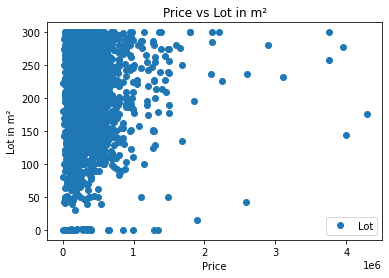

In [52]:
# Create a scatterplot 'Price' vs. 'Lot'

df_nolot.plot(x = 'Price', y='Lot',style='o')
plt.title('Price vs Lot in m²')  
plt.xlabel('Price')  
plt.ylabel('Lot in m²')  
plt.show()

In [53]:
# Reshape the variables into NumPy arrays Price Living_space.

X = df_nolot['Lot'].values.reshape(-1,1)
y = df_nolot['Price'].values.reshape(-1,1)

In [54]:
# Split data into a training set and a test set Price Living_space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
# Create a regression object.

regression = LinearRegression()

In [56]:
# Fit the regression object onto the training set Price Living_space

regression.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predict the values of y using X Price Living_space

y_predicted = regression.predict(X_test)

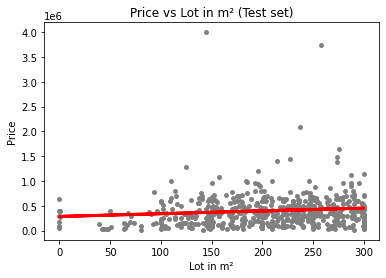

In [58]:
# Create a regression plot from the model on the test set Price Living_space.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Lot in m² (Test set)')
plot_test.xlabel('Lot in m²')
plot_test.ylabel('Price')
plot_test.show()

In [59]:
# Create objects that contain the model summary statistics, Price Living_space.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [60]:
# Print the model summary statistics, Price Living_space.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[560.59848541]]
Mean squared error:  111962332898.21169
R2 score:  0.016074270117673595


#### Very low r². Lots <= 300 m² does not explain the price

## 02b. Regression with Lot > 300

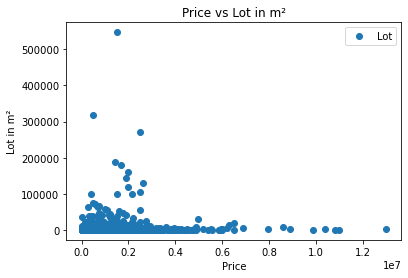

In [61]:
# Create a scatterplot 'Price' vs. 'Lot'

df_lot.plot(x = 'Price', y='Lot',style='o')
plt.title('Price vs Lot in m²')  
plt.xlabel('Price')  
plt.ylabel('Lot in m²')  
plt.show()

In [62]:
# Reshape the variables into NumPy arrays Price Living_space.

X = df_lot['Lot'].values.reshape(-1,1)
y = df_lot['Price'].values.reshape(-1,1)

In [63]:
# Split data into a training set and a test set Price Living_space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
# Create a regression object.

regression = LinearRegression()

In [65]:
# Fit the regression object onto the training set Price Living_space

regression.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predict the values of y using X Price Living_space

y_predicted = regression.predict(X_test)

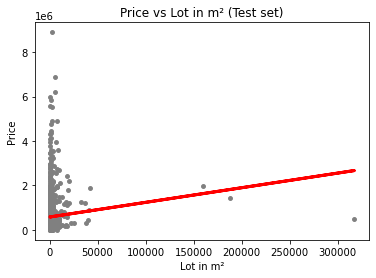

In [67]:
# Create a regression plot from the model on the test set Price Living_space.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Lot in m² (Test set)')
plot_test.xlabel('Lot in m²')
plot_test.ylabel('Price')
plot_test.show()

In [68]:
# Create objects that contain the model summary statistics, Price Living_space.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [69]:
# Print the model summary statistics, Price Living_space.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.59259719]]
Mean squared error:  397112289471.1323
R2 score:  0.0039463044423599936


#### The r² for Lot > 300 is also very low

## 02c. Regression with "Year_renovated" => 2015

In [72]:
# subsetting df_r "Year_renovated" >= 2015
df_r = df.loc[df['Year_renovated'] >= 2015]

In [73]:
df_r

Price               Type  Living_space     Lot  Usable_area  \
4      469000.0  Multiple dwelling        115.00   244.0         80.0   
8      364000.0             Duplex        227.00   973.0         83.0   
19     359000.0    Single dwelling        132.00   314.0         70.0   
21     585000.0  Mid-terrace house        152.11  2461.0         40.0   
24     650000.0  Mid-terrace house        250.00   790.0         80.0   
...         ...                ...           ...     ...          ...   
10509  127000.0  Mid-terrace house        140.00   558.0         40.0   
10521  190000.0             Duplex        168.00   820.0         80.0   
10527   80000.0  Mid-terrace house         85.00   219.0        120.0   
10532  312700.0           Bungalow        310.00   989.0        310.0   
10538   99000.0             Duplex        300.00   850.0        150.0   

          Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
4                  sofort     4.5       2.0        1.0     2.0      1968.0   
8          nach Absprache    10.0       4.0        4.0     2.0      1809.0   
19              Ab sofort     4.5       3.0        1.0     3.0      1987.0   
21         nach Absprache     4.0       3.0        1.0     2.0      2016.0   
24                     NaN    7.5       4.0        2.0     3.0      1981.0   
...                    ...    ...       ...        ...     ...         ...   
10509   nach Vereinbarung     6.0       4.0        1.0     2.0      1938.0   
10521                  NaN    7.0       5.0        4.0     3.0      1920.0   
10527           ab sofort     3.0       4.0        1.0     3.0      1900.0   
10532           ab sofort    15.0       4.0        2.0     2.0      1994.0   
10538              sofort    12.0       4.0        4.0     3.0      1833.0   

      Furnishing_quality  Year_renovated  \
4                refined          2019.0   
8                 normal          2015.0   
19                   NaN          2018.0   
21                   NaN          2016.0   
24                   NaN          2018.0   
...                  ...             ...   
10509             normal          2018.0   
10521                NaN          2016.0   
10527             normal          2017.0   
10532                NaN          2015.0   
10538             normal          2016.0   

                                  Condition               Heating  \
4                               refurbished       central heating   
8                                modernized       central heating   
19                               modernized         stove heating   
21                              dilapidated         stove heating   
24                               modernized         stove heating   
...                                     ...                   ...   
10509                             renovated         stove heating   
10521                           fixer-upper         stove heating   
10527                      first occupation    underfloor heating   
10532  first occupation after refurbishment           oil heating   
10538                           fixer-upper  night storage heater   

      Energy_source Energy_certificate  Energy_certificate_type  \
4               Öl           available       demand certificate   
8            Strom           available  consumption certificate   
19              Öl           available  consumption certificate   
21             Gas           available       demand certificate   
24              Öl           available  consumption certificate   
...             ...                ...                      ...   
10509          Gas           available       demand certificate   
10521         Holz           available  consumption certificate   
10527         Holz                 NaN                      NaN   
10532          Gas           available       demand certificate   
10538          Gas           available  consumption certificate   

      Energy_efficiency_class    

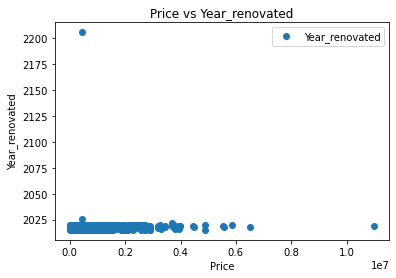

In [74]:
# Create a scatterplot 'Price' vs. 'Year_renovated'

df_r.plot(x = 'Price', y='Year_renovated',style='o')
plt.title('Price vs Year_renovated')  
plt.xlabel('Price')  
plt.ylabel('Year_renovated')  
plt.show()

In [75]:
# subsetting df without the outlier in time
df_rr = df_r.loc[df['Year_renovated'] < 2030]

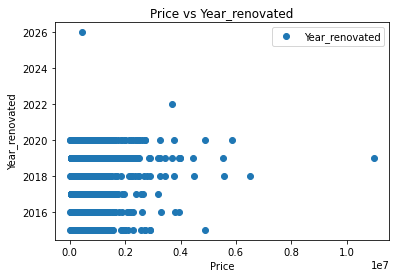

In [77]:
# Create a scatterplot 'Price' vs. 'Year_renovated'

df_rr.plot(x = 'Price', y='Year_renovated',style='o')
plt.title('Price vs Year_renovated')  
plt.xlabel('Price')  
plt.ylabel('Year_renovated')  
plt.show()

In [193]:
# Reshape the variables into NumPy arrays Price Living_space.

X = df_rr['Year_renovated'].values.reshape(-1,1)
y = df_rr['Price'].values.reshape(-1,1)

In [194]:
# Split data into a training set and a test set Price Living_space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [195]:
# Create a regression object.

regression = LinearRegression()

In [196]:
# Fit the regression object onto the training set Price Living_space

regression.fit(X_train, y_train)

LinearRegression()

In [197]:
# Predict the values of y using X Price Living_space

y_predicted = regression.predict(X_test)

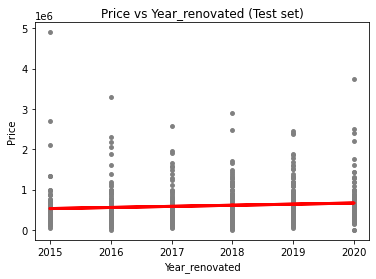

In [198]:
# Create a regression plot from the model on the test set Price Living_space.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Year_renovated (Test set)')
plot_test.xlabel('Year_renovated')
plot_test.ylabel('Price')
plot_test.show()

In [199]:
# Create objects that contain the model summary statistics, Price Living_space.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [200]:
# Print the model summary statistics, Price Living_space.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[27455.40846814]]
Mean squared error:  240016485898.8198
R2 score:  0.0005007960886828089


#### Also another poor r² 

## 03a. Compare descriptive statistics for Year_renovated <> 2015 

In [87]:
# subsetting df_r "Year_renovated" < 2015
df_r2 = df.loc[df['Year_renovated'] < 2015]

In [86]:
df_rr.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      2488.000     2488.000    2488.000    2488.000  2488.000  2488.000   
mean     599653.363      223.133    1362.222     109.058     7.562     4.248   
std      612043.452      153.510    7221.718     126.340     5.295     2.511   
min           0.000       16.320       0.000       0.000     1.000     0.000   
25%      280000.000      136.000     350.000      67.000     5.000     3.000   
50%      445000.000      185.000     618.500      80.000     6.000     4.000   
75%      699000.000      260.000    1000.250      95.000     9.000     4.000   
max    11000000.000     2535.000  270000.000    2535.000    84.000    61.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  2488.000  2488.000   2488.000       2488.000  2488.000      2488.000   
mean      2.428     2.275   1959.746       2017.747     2.697         2.033   
std       1.895     0.790     49.568          1.580     2.746         0.690   
min       0.000     0.000   1456.000       2015.000     1.000         1.000   
25%       2.000     2.000   1948.000       2017.000     1.000         2.000   
50%       2.000     2.000   1971.000       2018.000     2.000         2.000   
75%       3.000     3.000   1990.000       2019.000     3.000         2.000   
max      40.000     8.000   2021.000       2026.000    50.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        2488.000     2488.000   2391.000  
mean            4.333        4.200      3.036  
std             1.682        1.504      2.694  
min             1.000        1.000      1.000  
25%             3.000        4.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        5.000      4.000  
max             7.000        9.000     11.000

In [89]:
df_r2.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      2468.000     2468.000    2468.000    2468.000  2468.000  2468.000   
mean     479034.571      216.843    1613.374     111.925     7.645     4.193   
std      540451.599      144.447    6759.196     124.565     4.796     2.180   
min           0.000       30.000       0.000       0.000     1.000     0.000   
25%      196525.000      130.000     377.750      75.000     5.000     3.000   
50%      349000.000      180.000     696.500      80.000     6.000     4.000   
75%      574437.500      260.000    1152.750     100.000     9.000     4.000   
max    10800000.000     2100.000  188000.000    2500.000    72.000    36.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  2468.000  2468.000   2468.000       2468.000  2468.000      2468.000   
mean      2.281     2.228   1942.013       2003.413     2.660         2.015   
std       1.799     0.745     56.229         10.306     3.017         0.647   
min       0.000     0.000   1426.000       1900.000     1.000         1.000   
25%       1.000     2.000   1920.000       1999.000     1.000         2.000   
50%       2.000     2.000   1959.000       2006.000     2.000         2.000   
75%       3.000     3.000   1974.000       2011.000     3.000         2.000   
max      44.000    13.000   2019.000       2014.000    65.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        2468.000     2468.000   2337.000  
mean            4.340        3.715      3.030  
std             1.312        1.394      2.907  
min             1.000        1.000      1.000  
25%             4.000        3.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        4.000      3.000  
max             7.000        9.000     12.000

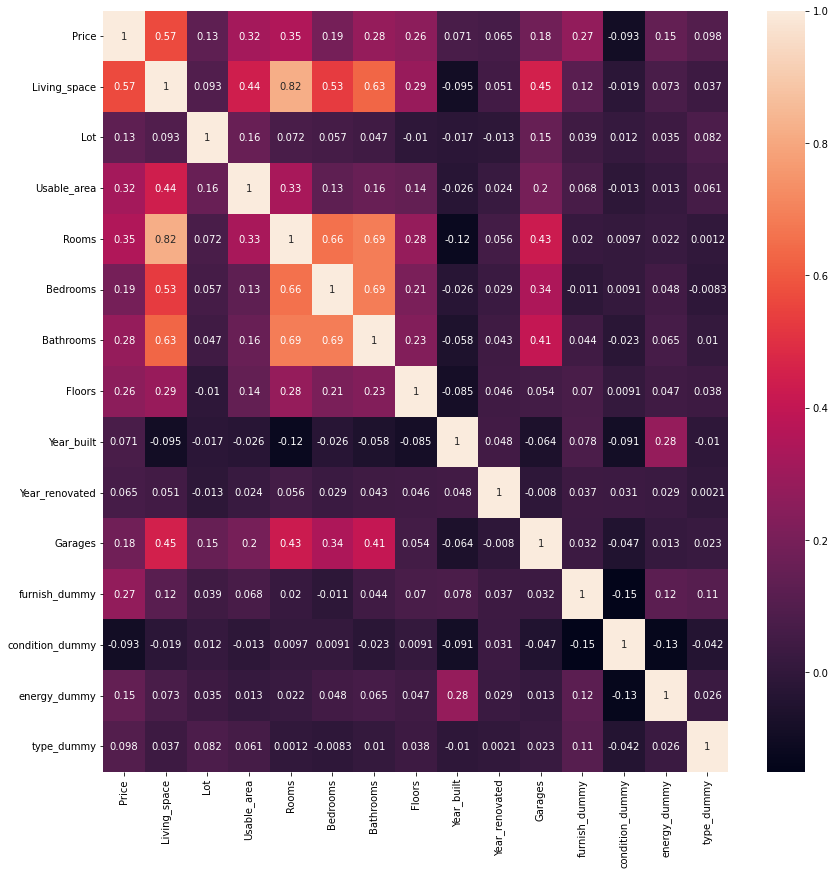

In [94]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_rr.corr(), annot = True, ax = ax)

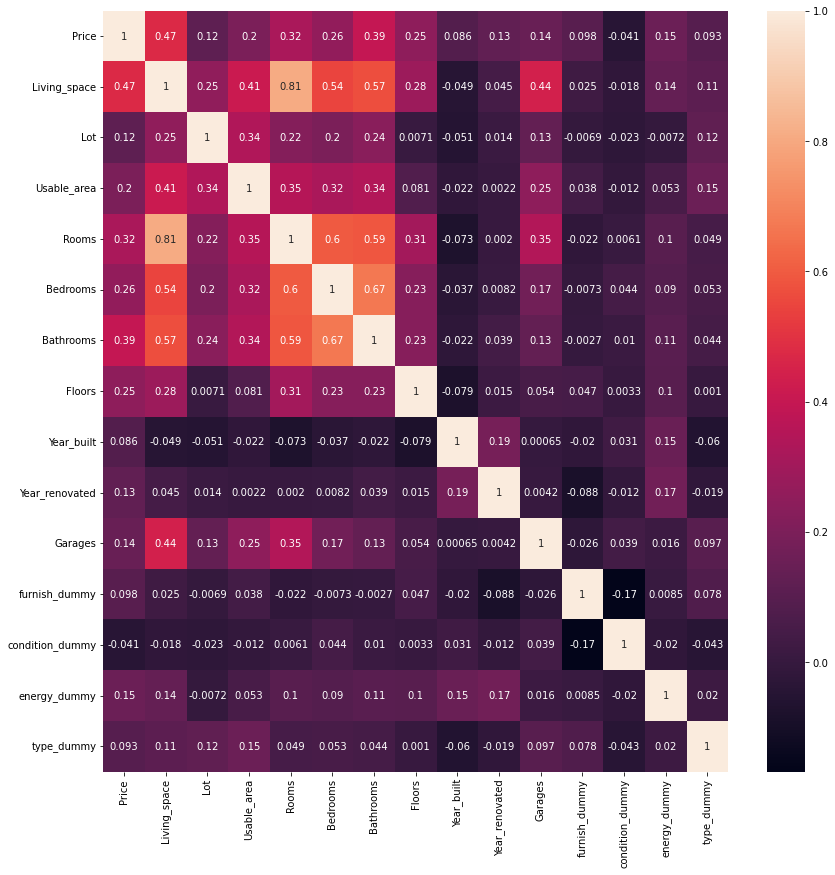

In [95]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_r2.corr(), annot = True, ax = ax)

In [105]:
# subsetting df_r "Year_renovated" < 2014
df_ru2014 = df.loc[df['Year_renovated'] < 2014]

In [106]:
# subsetting df_r "Year_renovated" >= 2014
df_ro2014 = df.loc[df['Year_renovated'] >= 2014]

In [107]:
df_ru2014.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      2258.000     2258.000    2258.000    2258.000  2258.000  2258.000   
mean     471632.572      217.112    1653.099     112.029     7.672     4.196   
std      536541.526      147.674    7028.324     126.112     4.914     2.229   
min           0.000       30.000       0.000       0.000     1.000     0.000   
25%      189000.000      130.000     380.500      75.250     5.000     3.000   
50%      340000.000      178.000     700.000      80.000     6.000     4.000   
75%      569000.000      260.000    1157.250     100.000     9.000     4.000   
max    10800000.000     2100.000  188000.000    2500.000    72.000    36.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  2258.000  2258.000   2258.000       2258.000  2258.000      2258.000   
mean      2.277     2.221   1940.861       2002.428     2.688         2.017   
std       1.853     0.748     56.966         10.232     3.095         0.648   
min       0.000     0.000   1426.000       1900.000     1.000         1.000   
25%       1.000     2.000   1916.000       1998.000     1.000         2.000   
50%       2.000     2.000   1958.000       2005.000     2.000         2.000   
75%       3.000     3.000   1973.000       2010.000     3.000         2.000   
max      44.000    13.000   2019.000       2013.000    65.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        2258.000     2258.000   2134.000  
mean            4.359        3.682      3.041  
std             1.282        1.384      2.918  
min             1.000        1.000      1.000  
25%             4.000        3.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        4.000      3.000  
max             7.000        9.000     12.000

In [108]:
df_ro2014.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      2699.000     2699.000    2699.000    2699.000  2699.000  2699.000   
mean     596398.125      222.395    1348.268     109.172     7.545     4.241   
std      609221.797      150.215    6965.153     124.893     5.165     2.449   
min           0.000       16.320       0.000       0.000     1.000     0.000   
25%      280000.000      136.000     350.000      68.000     5.000     3.000   
50%      440000.000      186.000     620.000      80.000     6.000     4.000   
75%      695000.000      260.000    1005.000      98.350     9.000     4.000   
max    11000000.000     2535.000  270000.000    2535.000    84.000    61.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  2699.000  2699.000   2699.000       2699.000  2699.000      2699.000   
mean      2.421     2.277   1959.310       2017.525     2.670         2.030   
std       1.843     0.784     49.307          4.060     2.694         0.686   
min       0.000     0.000   1456.000       2014.000     1.000         1.000   
25%       2.000     2.000   1942.000       2016.000     1.000         2.000   
50%       2.000     2.000   1971.000       2018.000     2.000         2.000   
75%       3.000     3.000   1990.000       2019.000     3.000         2.000   
max      40.000     8.000   2021.000       2206.000    50.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        2699.000     2699.000   2595.000  
mean            4.318        4.190      3.026  
std             1.675        1.499      2.700  
min             1.000        1.000      1.000  
25%             3.000        4.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        5.000      4.000  
max             7.000        9.000     11.000

In [109]:
# subsetting df_r "Year_renovated" < 2013
df_ru2013 = df.loc[df['Year_renovated'] < 2013]

In [110]:
# subsetting df_r "Year_renovated" >= 2013
df_ro2013 = df.loc[df['Year_renovated'] >= 2013]

In [111]:
df_ru2013.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      2099.000     2099.000    2099.000    2099.000  2099.000  2099.000   
mean     464968.132      217.578    1586.321     111.590     7.697     4.217   
std      523382.222      149.450    5990.248     127.025     4.967     2.280   
min           0.000       30.000       0.000       0.000     1.000     0.000   
25%      185000.000      130.000     385.000      77.000     5.000     3.000   
50%      338000.000      178.000     707.000      80.000     6.000     4.000   
75%      557000.000      260.000    1176.000     100.000     9.000     4.000   
max    10800000.000     2100.000  180000.000    2500.000    72.000    36.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  2099.000  2099.000   2099.000       2099.000  2099.000      2099.000   
mean      2.287     2.216   1941.108       2001.627     2.695         2.017   
std       1.901     0.746     54.780         10.174     3.131         0.646   
min       0.000     0.000   1426.000       1900.000     1.000         1.000   
25%       1.000     2.000   1915.000       1997.000     1.000         2.000   
50%       2.000     2.000   1957.000       2004.000     2.000         2.000   
75%       3.000     3.000   1972.000       2010.000     3.000         2.000   
max      44.000    13.000   2019.000       2012.000    65.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        2099.000     2099.000   1987.000  
mean            4.371        3.662      3.043  
std             1.256        1.392      2.926  
min             1.000        1.000      1.000  
25%             4.000        3.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        4.000      3.000  
max             7.000        9.000     12.000

In [112]:
df_ro2013.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      2858.000     2858.000    2858.000    2858.000  2858.000  2858.000   
mean     594351.568      221.759    1414.270     109.653     7.534     4.223   
std      613487.483      148.793    7649.446     124.287     5.114     2.403   
min           0.000       16.320       0.000       0.000     1.000     0.000   
25%      279000.000      136.000     350.000      68.000     5.000     3.000   
50%      439000.000      186.000     620.000      80.000     6.000     4.000   
75%      695000.000      260.000    1002.750     100.000     9.000     4.000   
max    11000000.000     2535.000  270000.000    2535.000    84.000    61.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  2858.000  2858.000   2858.000       2858.000  2858.000      2858.000   
mean      2.405     2.278   1958.102       2017.274     2.666         2.029   
std       1.808     0.783     51.769          4.079     2.688         0.685   
min       0.000     0.000   1456.000       2013.000     1.000         1.000   
25%       2.000     2.000   1938.250       2016.000     1.000         2.000   
50%       2.000     2.000   1971.000       2018.000     2.000         2.000   
75%       3.000     3.000   1989.000       2019.000     3.000         2.000   
max      40.000     8.000   2021.000       2206.000    50.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        2858.000     2858.000   2742.000  
mean            4.311        4.176      3.025  
std             1.670        1.487      2.706  
min             1.000        1.000      1.000  
25%             3.000        4.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        5.000      4.000  
max             7.000        9.000     11.000

In [113]:
# subsetting df_r "Year_renovated" < 2012
df_ru2012 = df.loc[df['Year_renovated'] < 2012]

In [114]:
# subsetting df_r "Year_renovated" >= 2012
df_ro2012 = df.loc[df['Year_renovated'] >= 2012]

In [115]:
df_ru2012.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      1901.000     1901.000    1901.000    1901.000  1901.000  1901.000   
mean     452825.412      215.986    1625.986     111.495     7.658     4.207   
std      495251.853      149.282    6258.349     128.094     4.968     2.312   
min           0.000       30.000       0.000       0.000     1.000     0.000   
25%      179000.000      129.000     387.000      80.000     5.000     3.000   
50%      329000.000      177.000     708.000      80.000     6.000     4.000   
75%      549000.000      255.000    1178.000     100.000     9.000     4.000   
max    10800000.000     2100.000  180000.000    2500.000    72.000    36.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  1901.000  1901.000   1901.000       1901.000  1901.000      1901.000   
mean      2.274     2.211   1939.525       2000.547     2.665         2.022   
std       1.930     0.747     55.770         10.096     3.055         0.646   
min       0.000     0.000   1426.000       1900.000     1.000         1.000   
25%       1.000     2.000   1912.000       1996.000     1.000         2.000   
50%       2.000     2.000   1956.000       2002.000     2.000         2.000   
75%       2.000     3.000   1972.000       2008.000     3.000         2.000   
max      44.000    13.000   2019.000       2011.000    65.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        1901.000     1901.000   1800.000  
mean            4.380        3.633      3.018  
std             1.216        1.397      2.917  
min             1.000        1.000      1.000  
25%             4.000        3.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        4.000      3.000  
max             7.000        9.000     12.000

In [116]:
df_ro2012.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      3056.000     3056.000    3056.000    3056.000  3056.000  3056.000   
mean     593522.179      222.478    1400.743     109.838     7.569     4.228   
std      621760.537      148.910    7416.009     123.785     5.104     2.376   
min           0.000       16.320       0.000       0.000     1.000     0.000   
25%      278750.000      136.000     350.000      67.000     5.000     3.000   
50%      435000.000      186.000     630.000      80.000     6.000     4.000   
75%      695000.000      260.000    1013.000     100.000     9.000     4.000   
max    11000000.000     2535.000  270000.000    2535.000    84.000    61.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  3056.000  3056.000   3056.000       3056.000  3056.000      3056.000   
mean      2.405     2.277   1957.986       2016.932     2.686         2.026   
std       1.795     0.780     51.151          4.153     2.772         0.683   
min       0.000     0.000   1456.000       2012.000     1.000         1.000   
25%       2.000     2.000   1938.000       2015.000     1.000         2.000   
50%       2.000     2.000   1971.000       2017.000     2.000         2.000   
75%       3.000     3.000   1988.250       2019.000     3.000         2.000   
max      40.000     8.000   2021.000       2206.000    50.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        3056.000     3056.000   2929.000  
mean            4.309        4.161      3.042  
std             1.665        1.478      2.727  
min             1.000        1.000      1.000  
25%             3.000        4.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        5.000      4.000  
max             7.000        9.000     11.000

In [117]:
# subsetting df_r "Year_renovated" < 2011
df_ru2011 = df.loc[df['Year_renovated'] < 2011]

In [118]:
# subsetting df_r "Year_renovated" >= 2011
df_ro2011 = df.loc[df['Year_renovated'] >= 2011]

In [119]:
df_ru2011.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      1793.000     1793.000    1793.000    1793.000  1793.000  1793.000   
mean     444412.871      215.071    1601.304     112.029     7.655     4.206   
std      492095.872      149.414    6234.745     129.966     5.027     2.347   
min           0.000       30.000       0.000       0.000     1.000     0.000   
25%      175000.000      127.000     387.000      80.000     5.000     3.000   
50%      325000.000      175.000     708.000      80.000     6.000     4.000   
75%      535000.000      253.000    1188.000     100.000     9.000     4.000   
max    10800000.000     2100.000  180000.000    2500.000    72.000    36.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  1793.000  1793.000   1793.000       1793.000  1793.000      1793.000   
mean      2.276     2.209   1939.312       1999.917     2.647         2.016   
std       1.972     0.753     55.275         10.054     3.080         0.638   
min       0.000     0.000   1426.000       1900.000     1.000         1.000   
25%       1.000     2.000   1911.000       1996.000     1.000         2.000   
50%       2.000     2.000   1956.000       2001.000     2.000         2.000   
75%       2.000     3.000   1971.000       2007.000     3.000         2.000   
max      44.000    13.000   2019.000       2010.000    65.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        1793.000     1793.000   1700.000  
mean            4.374        3.606      3.027  
std             1.194        1.396      2.923  
min             1.000        1.000      1.000  
25%             4.000        3.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        4.000      3.000  
max             7.000        9.000     12.000

In [120]:
df_ro2011.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      3164.000     3164.000    3164.000    3164.000  3164.000  3164.000   
mean     593486.918      222.776    1422.419     109.592     7.574     4.228   
std      618724.814      148.828    7391.276     122.821     5.067     2.355   
min           0.000       16.320       0.000       0.000     1.000     0.000   
25%      277250.000      136.000     350.000      67.000     5.000     3.000   
50%      435000.000      186.770     633.000      80.000     6.000     4.000   
75%      695000.000      261.000    1014.750     100.000     9.000     4.000   
max    11000000.000     2535.000  270000.000    2535.000    84.000    61.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  3164.000  3164.000   3164.000       3164.000  3164.000      3164.000   
mean      2.400     2.276   1957.476       2016.729     2.696         2.029   
std       1.774     0.776     51.684          4.221     2.766         0.686   
min       0.000     0.000   1456.000       2011.000     1.000         1.000   
25%       2.000     2.000   1938.000       2015.000     1.000         2.000   
50%       2.000     2.000   1971.000       2017.000     2.000         2.000   
75%       3.000     3.000   1988.000       2019.000     3.000         2.000   
max      40.000     8.000   2021.000       2206.000    50.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        3164.000     3164.000   3029.000  
mean            4.315        4.158      3.036  
std             1.660        1.474      2.730  
min             1.000        1.000      1.000  
25%             3.000        4.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        4.250      4.000  
max             7.000        9.000     11.000

## 03b. Compare renovated and not renovated

In [97]:
# subsetting df_ren: House were renovated
df_ren = df.loc[df['Year_renovated'].isnull() == False]

In [98]:
df_ren

Price               Type  Living_space     Lot  Usable_area  \
3       259000.0          Farmhouse         140.0   814.0         80.0   
4       469000.0  Multiple dwelling         115.0   244.0         80.0   
8       364000.0             Duplex         227.0   973.0         83.0   
10     1750000.0  Mid-terrace house         210.0  1460.0         70.0   
15     1100000.0             Duplex         230.0   526.0         47.0   
...          ...                ...           ...     ...          ...   
10532   312700.0           Bungalow         310.0   989.0        310.0   
10535    38000.0          Farmhouse         110.0   471.0        110.0   
10536   348000.0                NaN         200.0  1610.0        650.0   
10537   472500.0             Duplex         485.0   320.0        135.0   
10538    99000.0             Duplex         300.0   850.0        150.0   

          Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
3       nach Vereinbarung     4.0       4.0        2.0     2.0      1900.0   
4                  sofort     4.5       2.0        1.0     2.0      1968.0   
8          nach Absprache    10.0       4.0        4.0     2.0      1809.0   
10      Nach Vereinbarung     6.0       4.0        2.0     3.0      1939.0   
15         nach Absprache     7.0       3.0        3.0     2.0      1914.0   
...                    ...    ...       ...        ...     ...         ...   
10532           ab sofort    15.0       4.0        2.0     2.0      1994.0   
10535              sofort     5.0       2.0        1.0     3.0      1900.0   
10536              sofort     7.0       5.0        2.0     2.0      1974.0   
10537              sofort    15.0      11.0        4.0     3.0      1906.0   
10538              sofort    12.0       4.0        4.0     3.0      1833.0   

      Furnishing_quality  Year_renovated  \
3                  basic          2000.0   
4                refined          2019.0   
8                 normal          2015.0   
10                normal          2014.0   
15                   NaN          1995.0   
...                  ...             ...   
10532                NaN          2015.0   
10535            refined          1995.0   
10536             normal          1996.0   
10537                NaN          2010.0   
10538             normal          2016.0   

                                  Condition               Heating  \
3                               fixer-upper       central heating   
4                               refurbished       central heating   
8                                modernized       central heating   
10                               modernized         stove heating   
15                               maintained       central heating   
...                                     ...                   ...   
10532  first occupation after refurbishment           oil heating   
10535                           refurbished         stove heating   
10536                             renovated         stove heating   
10537                           fixer-upper         stove heating   
10538                           fixer-upper  night storage heater   

      Energy_source        Energy_certificate  Energy_certificate_type  \
3            Strom                  available       demand certificate   
4               Öl                  available       demand certificate   
8            Strom                  available  consumption certificate   
10              Öl                  available  consumption certificate   
15           Strom                  available       demand certificate   
...             ...                       ...                      ...   
10532          Gas                  available       demand certificate   
10535          Gas   available for inspection                      NaN   
10536           Öl   available for inspection                      NaN   
10537          Gas                  available       demand certificate   
10538        

In [99]:
# subsetting df_ren: House were renovated
df_noren = df.loc[df['Year_renovated'].isnull() == True]

In [100]:
df_noren

Price                  Type  Living_space     Lot  Usable_area  \
0       498000.0     Multiple dwelling        106.00   229.0         80.0   
1       495000.0     Mid-terrace house        140.93   517.0         20.0   
5      1400000.0     Mid-terrace house        310.00   860.0        100.0   
7       630000.0                Duplex        263.00   406.0        118.0   
11      470000.0                Duplex        268.00  1511.0         52.0   
...          ...                   ...           ...     ...          ...   
10520   185000.0     Mid-terrace house        114.00   650.0        114.0   
10523   140000.0  Residential property        161.00   287.0        204.0   
10531   339000.0                 Villa        287.00   624.0         69.0   
10533    35000.0             Farmhouse        200.00   371.0        400.0   
10534    35500.0      Special property         47.00  1400.0         80.0   

          Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
0              01.10.2020     5.5       3.0        1.0     2.0      2005.0   
1              01.01.2021     6.0       3.0        2.0     2.0      1994.0   
5                  sofort     8.0       4.0        2.0     3.0      1969.0   
7              01.04.2020    10.0       4.0        2.0     3.0      1989.0   
11                     NaN   12.0       9.0        3.0     3.0      1976.0   
...                    ...    ...       ...        ...     ...         ...   
10520   nach Vereinbarung     4.0       3.0        2.0     1.0      1991.0   
10523                  NaN    6.0       4.0        3.0     2.0      1800.0   
10531          01.09.2020     6.0       4.0        2.0     3.0      2000.0   
10533              sofort     8.0       4.0        2.0     3.0      1971.0   
10534              sofort     2.0       1.0        1.0     1.0      1985.0   

      Furnishing_quality  Year_renovated    Condition             Heating  \
0                 normal             NaN   modernized     central heating   
1                  basic             NaN   modernized       stove heating   
5                  basic             NaN   maintained                 NaN   
7                  basic             NaN   modernized       stove heating   
11                 basic             NaN   modernized       stove heating   
...                  ...             ...          ...                 ...   
10520              basic             NaN   modernized       stove heating   
10523             normal             NaN   modernized     central heating   
10531              luxus             NaN          NaN           heat pump   
10533            refined             NaN  refurbished  underfloor heating   
10534            refined             NaN   maintained     central heating   

      Energy_source        Energy_certificate  Energy_certificate_type  \
0              Gas                  available       demand certificate   
1               NaN       not required by law                      NaN   
5               Öl                  available  consumption certificate   
7              Gas                  available       demand certificate   
11              Öl                  available       demand certificate   
...             ...                       ...                      ...   
10520          Gas                  available  consumption certificate   
10523          Gas   available for inspection                      NaN   
10531   Flüssiggas                  available  consumption certificate   
10533         Holz                        NaN                      NaN   
10534          Gas   available for inspection                      NaN   

      Energy_efficiency_class              State                         City  \
0                          D   Baden-Württemberg                Bodenseekreis   
1                         NaN  Baden-Württemberg             Konstanz (Kreis)   
5                         NaN  Baden-Württemberg                    Stuttgart   
7          

In [101]:
df_ren.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      4957.000     4957.000    4957.000    4957.000  4957.000  4957.000   
mean     539565.239      219.989    1487.123     110.473     7.603     4.220   
std      580529.162      149.071    6994.940     125.445     5.052     2.351   
min           0.000       16.320       0.000       0.000     1.000     0.000   
25%      239000.000      133.000     361.000      70.000     5.000     3.000   
50%      395000.000      182.000     660.000      80.000     6.000     4.000   
75%      649000.000      260.000    1070.000     100.000     9.000     4.000   
max    11000000.000     2535.000  270000.000    2535.000    84.000    61.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  4957.000  4957.000   4957.000       4957.000  4957.000      4957.000   
mean      2.355     2.252   1950.906       2010.648     2.678         2.024   
std       1.849     0.768     53.719         10.639     2.884         0.669   
min       0.000     0.000   1426.000       1900.000     1.000         1.000   
25%       2.000     2.000   1930.000       2006.000     1.000         2.000   
50%       2.000     2.000   1965.000       2015.000     2.000         2.000   
75%       3.000     3.000   1980.000       2018.000     3.000         2.000   
max      44.000    13.000   2021.000       2206.000    65.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        4957.000     4957.000   4729.000  
mean            4.336        3.959      3.033  
std             1.509        1.470      2.800  
min             1.000        1.000      1.000  
25%             4.000        4.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        4.000      4.000  
max             7.000        9.000     12.000

In [102]:
df_noren.describe().applymap('{:.3f}'.format)

Price Living_space         Lot Usable_area     Rooms  Bedrooms  \
count      4859.000     4859.000    4859.000    4859.000  4859.000  4859.000   
mean     569025.039      212.043    1474.465     107.647     7.169     4.010   
std      636439.339      182.572   10265.830     156.630     5.827     1.837   
min           0.000        0.000       0.000       0.000     1.000     1.000   
25%      269000.000      129.055     366.000      80.000     5.000     3.000   
50%      420900.000      170.000     646.000      80.000     6.000     4.000   
75%      675000.000      241.000    1011.000      80.000     8.000     4.000   
max    13000000.000     4350.000  547087.000    4034.000   170.000    31.000   

      Bathrooms    Floors Year_built Year_renovated   Garages furnish_dummy  \
count  4859.000  4859.000   4859.000          0.000  4859.000      4859.000   
mean      2.153     2.181   1969.149            nan     2.417         1.823   
std       1.323     0.669     51.382            nan     2.918         0.753   
min       0.000     0.000   1300.000            nan     1.000         1.000   
25%       1.000     2.000   1958.000            nan     1.000         1.000   
50%       2.000     2.000   1978.000            nan     2.000         2.000   
75%       2.000     2.000   2001.000            nan     2.000         2.000   
max      26.000     7.000   2022.000            nan    70.000         4.000   

      condition_dummy energy_dummy type_dummy  
count        4859.000     4859.000   4706.000  
mean            4.052        4.243      2.967  
std             1.467        1.740      2.711  
min             1.000        1.000      1.000  
25%             3.000        4.000      1.000  
50%             5.000        4.000      2.000  
75%             5.000        5.000      3.000  
max             7.000        9.000     12.000

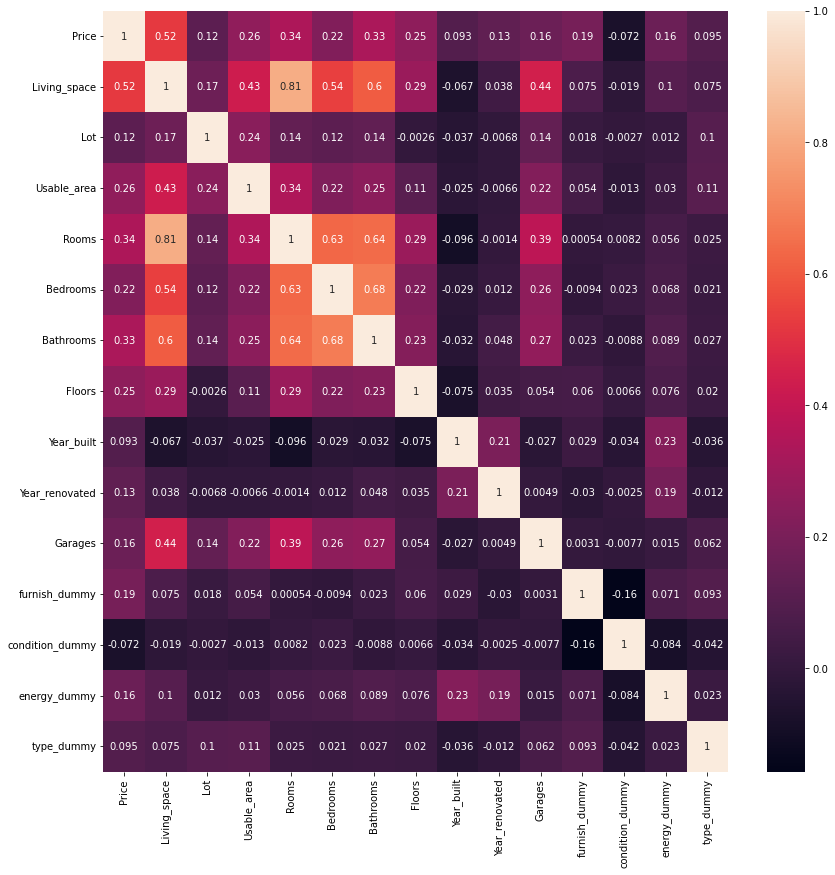

In [103]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_ren.corr(), annot = True, ax = ax)

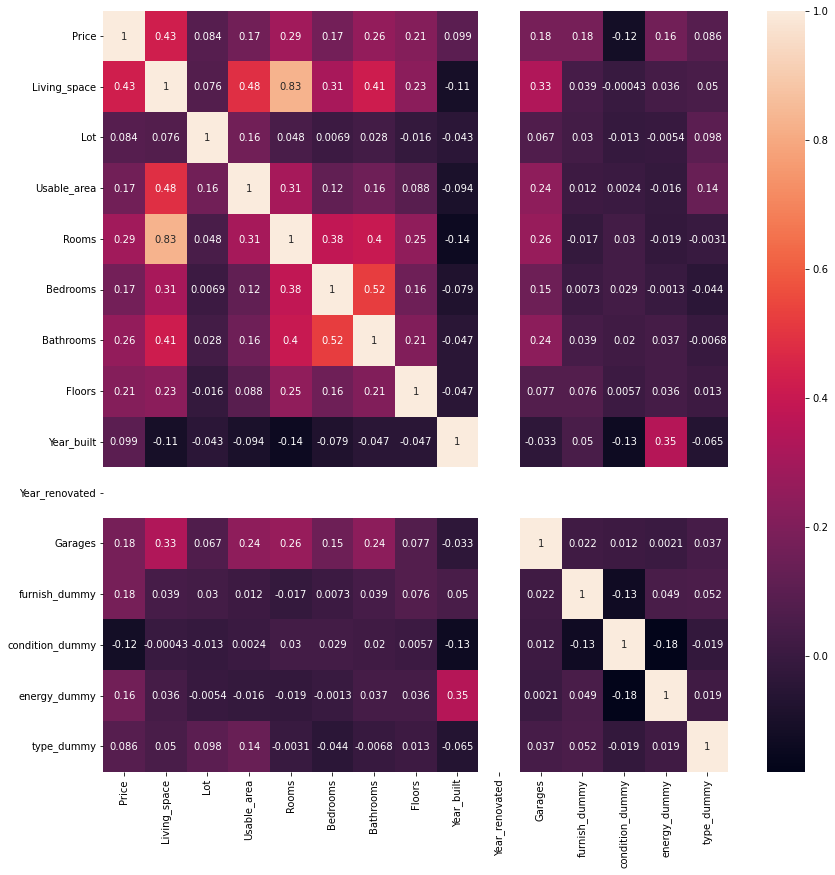

In [104]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_noren.corr(), annot = True, ax = ax)

## 04. Regression Version 2

## 04a. Regression Price vs Max m² for Germany

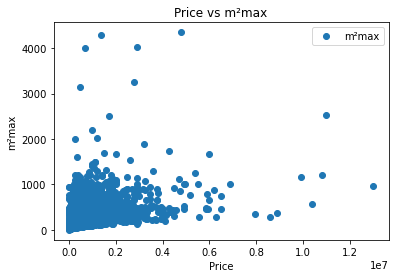

In [113]:
# Create a scatterplot 'Price' vs. 'Living_space'

df.plot(x = 'Price', y='m²max',style='o')
plt.title('Price vs m²max')  
plt.xlabel('Price')  
plt.ylabel('m²max')  
plt.show()

In [116]:
# Reshape the variables into NumPy arrays Price Living_space.

X = df['m²max'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [117]:
# Split data into a training set and a test set Price Living_space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [118]:
# Create a regression object.

regression = LinearRegression()

In [119]:
# Fit the regression object onto the training set Price Living_space

regression.fit(X_train, y_train)

LinearRegression()

In [120]:
# Predict the values of y using X Price Living_space

y_predicted = regression.predict(X_test)

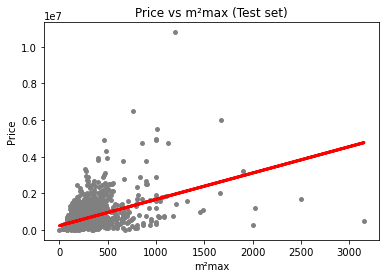

In [121]:
# Create a regression plot from the model on the test set Price Living_space.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs m²max (Test set)')
plot_test.xlabel('m²max')
plot_test.ylabel('Price')
plot_test.show()

In [122]:
# Create objects that contain the model summary statistics, Price Living_space.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [123]:
# Print the model summary statistics, Price Living_space.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1438.93275667]]
Mean squared error:  246527458243.785
R2 score:  0.21545160862397017


In [124]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [125]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

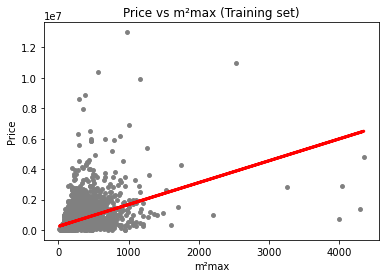

In [126]:
# Create a regression plot from the model on the test set Price Living_space.

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs m²max (Training set)')
plot_test.xlabel('m²max')
plot_test.ylabel('Price')
plot_test.show()

In [127]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1438.93275667]]
Mean squared error:  323385771615.5903
R2 score:  0.1813461098473097


## 04b. Regression Price vs Max m² for city-states

In [128]:
city_list = ['Hamburg', 'Bremen', 'Berlin']

In [129]:
# subsetting city states
df_city = df[df['State'].isin(city_list)]

In [131]:
df_city

Price               Type  Living_space     Lot  Usable_area  \
2635  1650000.0              Villa        260.00   988.0         80.0   
2636  1850000.0              Villa        545.00  1378.0        325.0   
2637   398000.0  Mid-terrace house         70.00   676.0         80.0   
2638   398000.0  Mid-terrace house        113.00   855.0         80.0   
2639   280000.0  Mid-terrace house         90.13   531.0         80.0   
...         ...                ...           ...     ...          ...   
3420   570000.0    Single dwelling        102.00   700.0         65.0   
3421   597000.0          Farmhouse        103.60   103.6         92.0   
3422  1449000.0              Villa        264.00   950.0        161.0   
3423   689000.0    Single dwelling        193.00   550.0         33.0   
3424   960000.0  Mid-terrace house        170.00   520.0         80.0   

      Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
2635               NaN   12.0       5.0        2.0     2.0      1934.0   
2636               NaN   12.0       4.0        2.0     2.0      1999.0   
2637               NaN    3.0       4.0        2.0     2.0      1948.0   
2638               NaN    6.0       4.0        2.0     2.0      1912.0   
2639               NaN    4.0       4.0        2.0     2.0      1930.0   
...                ...    ...       ...        ...     ...         ...   
3420               NaN    5.0       4.0        2.0     4.0      2006.0   
3421       01.04.2020     3.0       4.0        1.0     3.0      2012.0   
3422               NaN    6.0       4.0        3.0     2.0      2010.0   
3423               NaN    7.0       5.0        2.0     3.0      1990.0   
3424   nach Absprache     5.0       4.0        4.0     2.0      2014.0   

     Furnishing_quality  Year_renovated    Condition          Heating  \
2635              basic             NaN   modernized  central heating   
2636              luxus             NaN   modernized    stove heating   
2637            refined             NaN   maintained    stove heating   
2638             normal             NaN   modernized    stove heating   
2639             normal             NaN   maintained    stove heating   
...                 ...             ...          ...              ...   
3420                NaN             NaN  dilapidated    stove heating   
3421                NaN             NaN  dilapidated    stove heating   
3422              luxus             NaN  dilapidated      oil heating   
3423                NaN          2015.0   modernized    stove heating   
3424                NaN             NaN  dilapidated    stove heating   

     Energy_source        Energy_certificate  Energy_certificate_type  \
2635          Gas                  available       demand certificate   
2636           Öl                        NaN                      NaN   
2637          Gas   available for inspection                      NaN   
2638          Gas   available for inspection                      NaN   
2639          Gas                  available       demand certificate   
...            ...                       ...                      ...   
3420          Gas                  available  consumption certificate   
3421           NaN       not required by law                      NaN   
3422        Strom                  available  consumption certificate   
3423          Gas                  available  consumption certificate   
3424          Gas   available for inspection       demand certificate   

     Energy_efficiency_class    State                       City Place  \
2635                     NaN   Berlin  Hermsdorf (Reinickendorf)   NaN   
2636                     NaN   Berlin           Rudow (Neukölln)   NaN   
2637                     NaN   Berlin    Kaulsdorf (Hellersdorf)   NaN   
2638                     NaN   Berlin        Bohnsdorf (Treptow)   NaN   
2639                      F    Berlin          Grünau (Köpenick)   NaN   
...                      ...      ...         

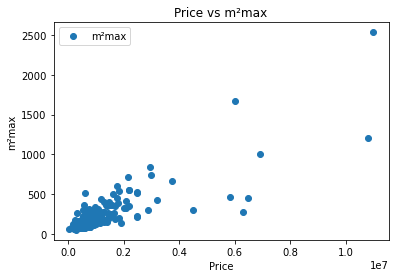

In [132]:
# Create a scatterplot 'Price' vs. 'Living_space'

df_city.plot(x = 'Price', y='m²max',style='o')
plt.title('Price vs m²max')  
plt.xlabel('Price')  
plt.ylabel('m²max')  
plt.show()

In [133]:
# Reshape the variables into NumPy arrays Price Living_space.

X = df_city['m²max'].values.reshape(-1,1)
y = df_city['Price'].values.reshape(-1,1)

In [134]:
# Split data into a training set and a test set Price Living_space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [135]:
# Create a regression object.

regression = LinearRegression()

In [136]:
# Fit the regression object onto the training set Price Living_space

regression.fit(X_train, y_train)

LinearRegression()

In [137]:
# Predict the values of y using X Price Living_space

y_predicted = regression.predict(X_test)

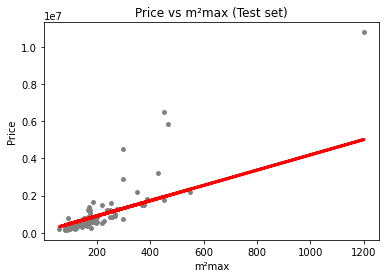

In [138]:
# Create a regression plot from the model on the test set Price Living_space.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs m²max (Test set)')
plot_test.xlabel('m²max')
plot_test.ylabel('Price')
plot_test.show()

In [139]:
# Create objects that contain the model summary statistics, Price Living_space.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [140]:
# Print the model summary statistics, Price Living_space.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4118.46879361]]
Mean squared error:  1022156645611.6542
R2 score:  0.5388748938488532


In [141]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [142]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

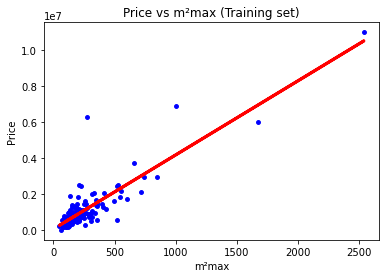

In [152]:
# Create a regression plot from the model on the test set Price Living_space.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs m²max (Training set)')
plot_test.xlabel('m²max')
plot_test.ylabel('Price')
plot_test.show()

In [151]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4118.46879361]]
Mean squared error:  302221528751.98285
R2 score:  0.7612549216660073


## 04c. Regression for "Type"

In [121]:
df.groupby('Type').agg({'Price': ['count','mean','min','max']}).applymap('{:.0f}'.format)

Price                           
                     count     mean     min       max
Type                                                 
Bungalow               239   872528   28680   6900000
Castle                   7  1185571  149000   2300000
Corner house           177   469612       0   6300000
Duplex                1980   628862       0  11000000
Farmhouse              544   359749       0   1490000
Mid-terrace house     3980   490836       0   8900000
Multiple dwelling      356   414137   25000   1650000
Residential property   351   606136       0   4900000
Single dwelling       1109   453911       0   5575000
Special property       330   462038   12000   1999000
Villa                  362  1492930       0  13000000

In [34]:
# subsetting "Type"
df_bungalow = df.loc[df['Type']==('Bungalow')]

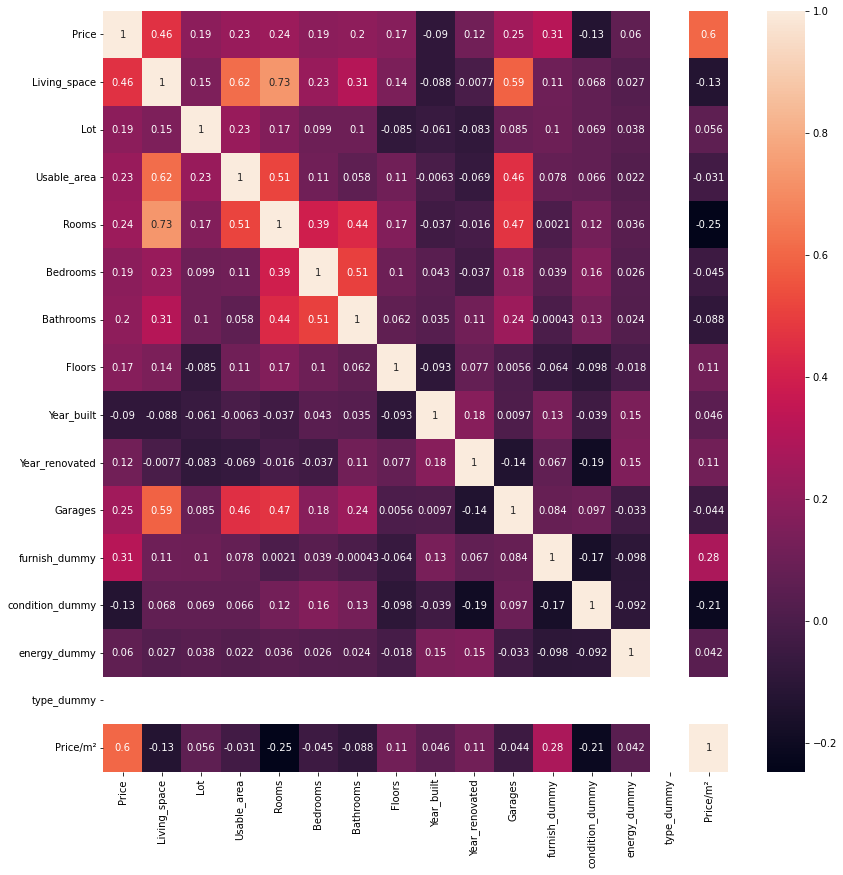

In [222]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_bungalow.corr(), annot = True, ax = ax)

In [35]:
# subsetting "Type"
df_castle = df.loc[df['Type']==('Castle')]

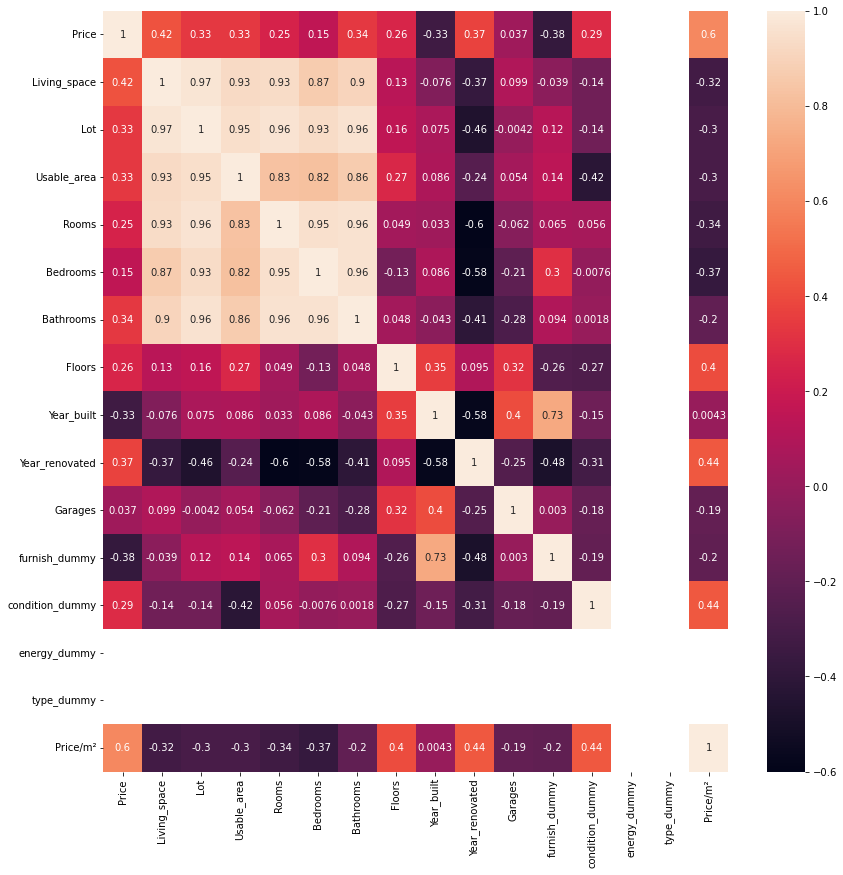

In [225]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_castle.corr(), annot = True, ax = ax)

In [36]:
# subsetting "Type"
df_Corner = df.loc[df['Type']==('Corner house')]

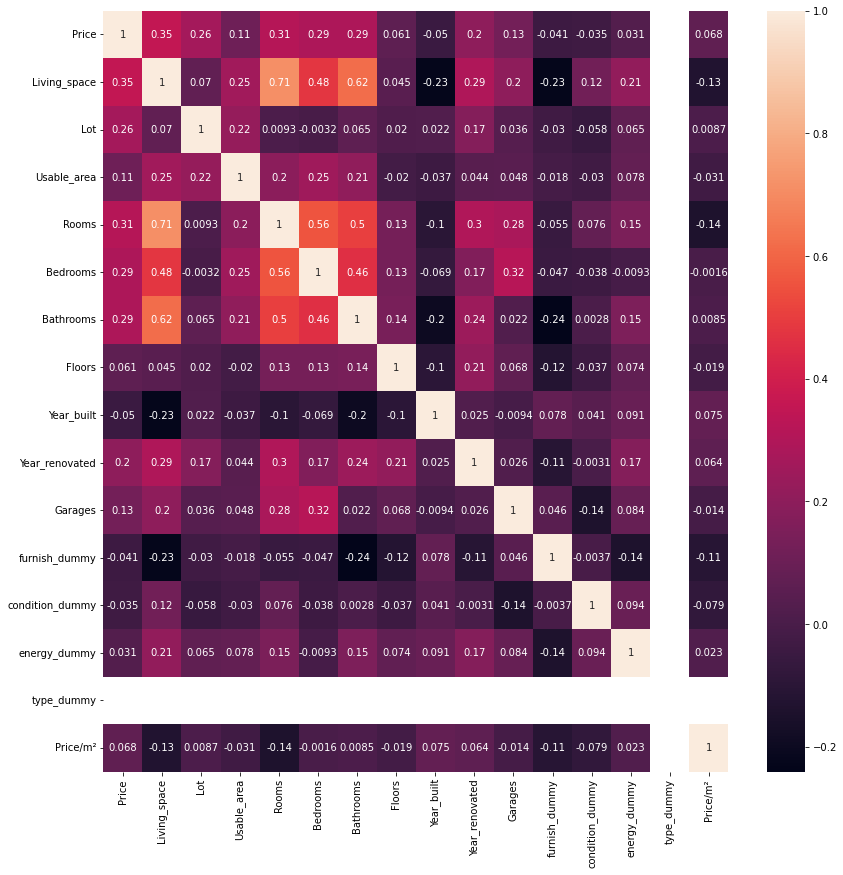

In [227]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_Corner.corr(), annot = True, ax = ax)

In [37]:
# subsetting "Type"
df_Duplex = df.loc[df['Type']==('Duplex')]

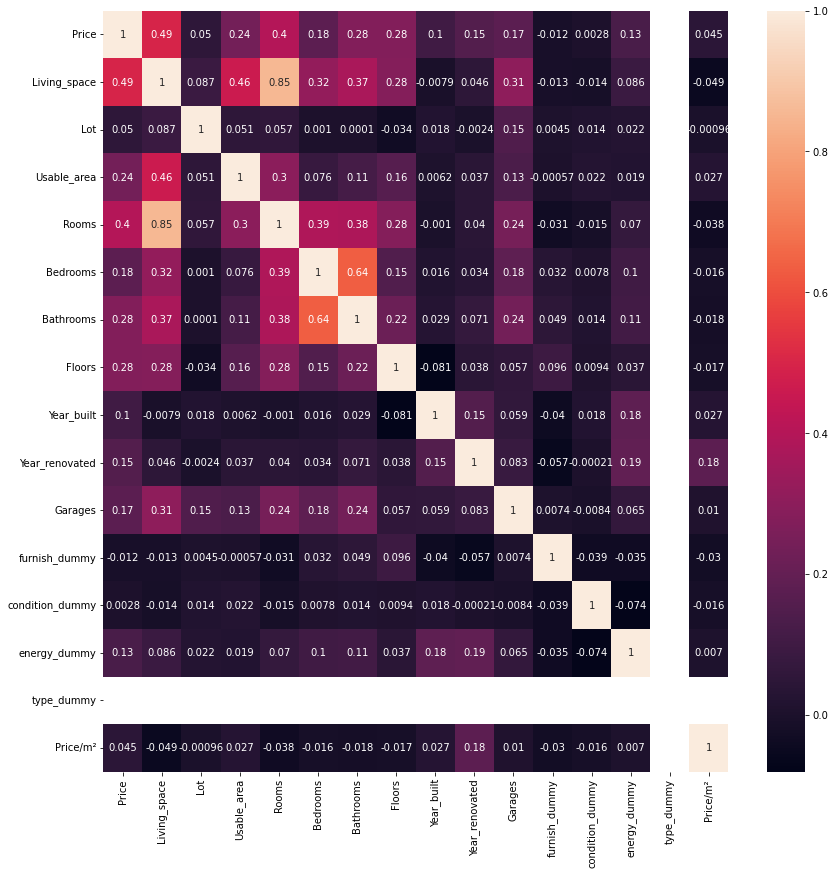

In [229]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_Duplex.corr(), annot = True, ax = ax)

In [38]:
# subsetting "Type"
df_Farmhouse = df.loc[df['Type']==('Farmhouse')]

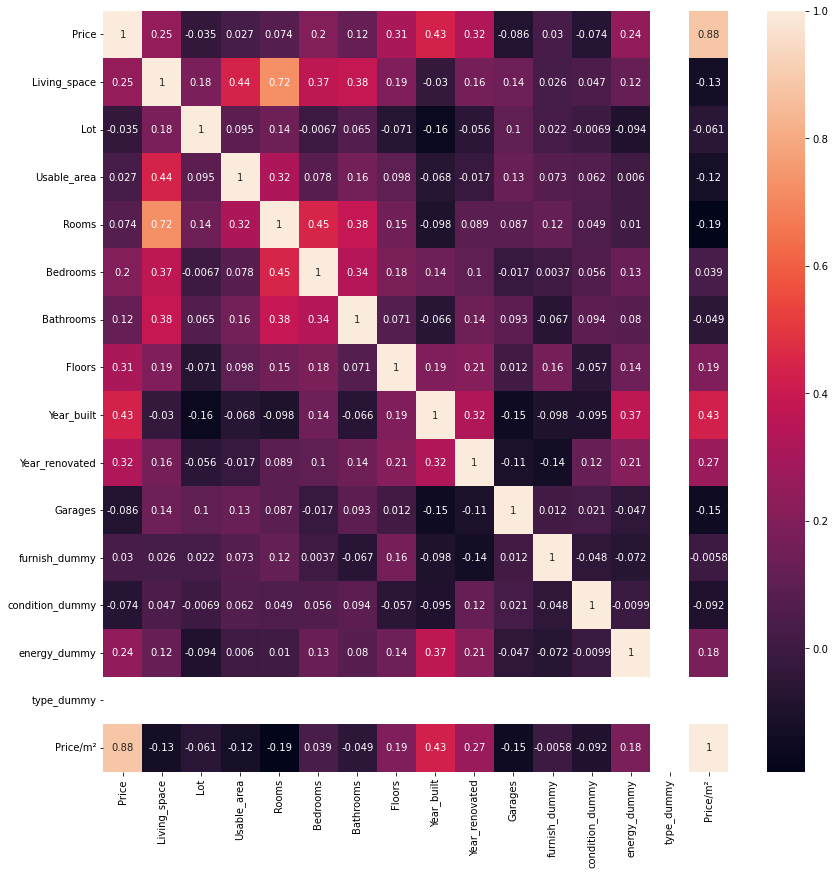

In [231]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_Farmhouse.corr(), annot = True, ax = ax)

In [39]:
# subsetting "Type"
df_terrace = df.loc[df['Type']==('Mid-terrace house')]

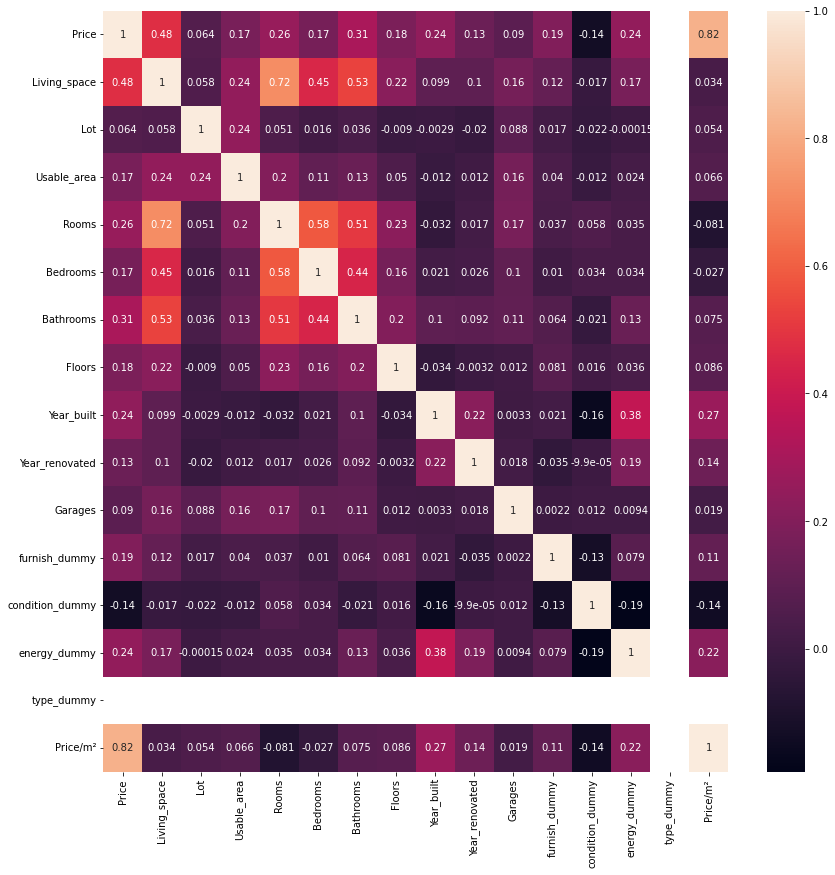

In [233]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_terrace.corr(), annot = True, ax = ax)

In [40]:
# subsetting "Type"
df_multiple = df.loc[df['Type']==('Multiple dwelling')]

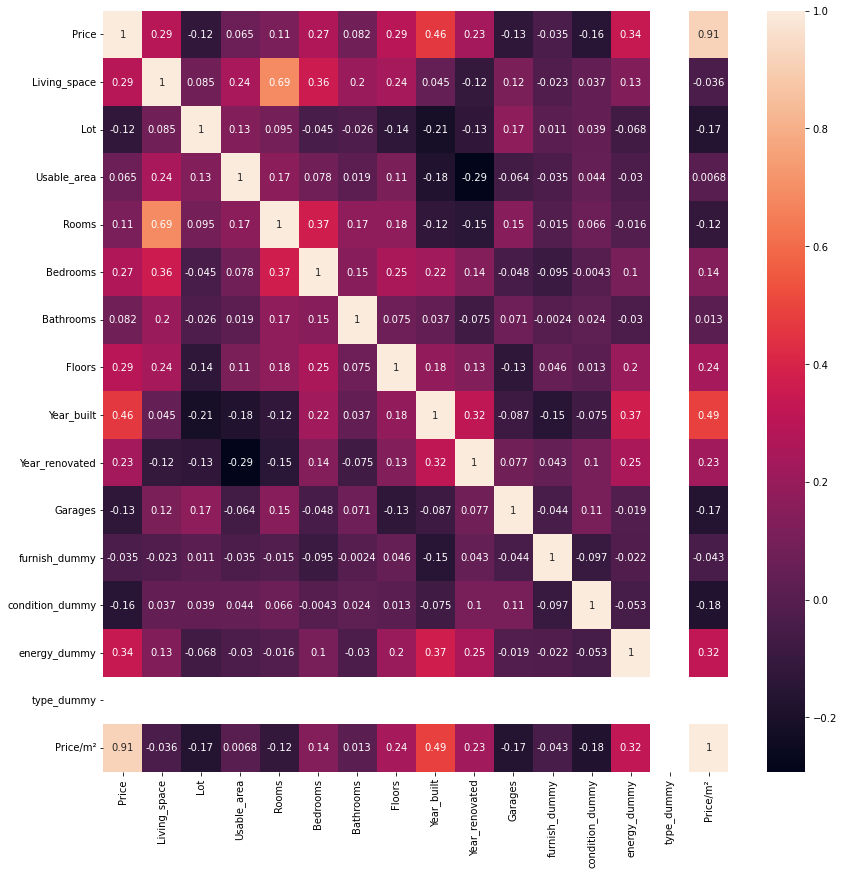

In [235]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_multiple.corr(), annot = True, ax = ax)

In [41]:
# subsetting "Type"
df_Residential = df.loc[df['Type']==('Residential property')]

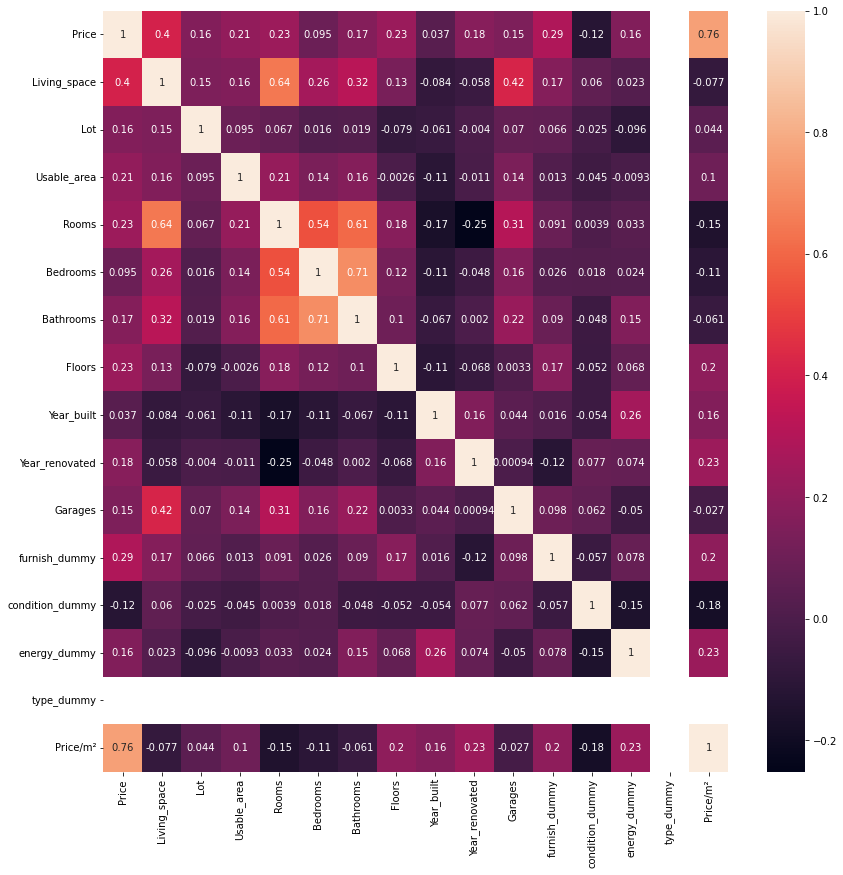

In [237]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_Residential.corr(), annot = True, ax = ax)

In [42]:
# subsetting "Type"
df_Single = df.loc[df['Type']==('Single dwelling')]

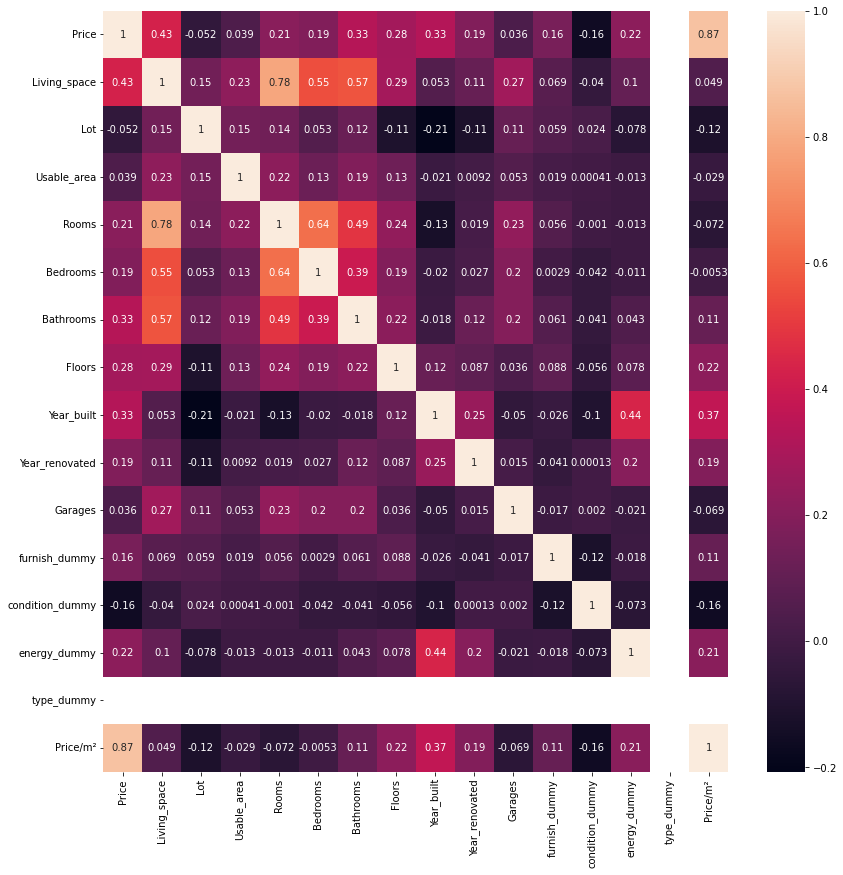

In [239]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_Single.corr(), annot = True, ax = ax)

In [43]:
# subsetting "Type"
df_Special = df.loc[df['Type']==('Special property')]

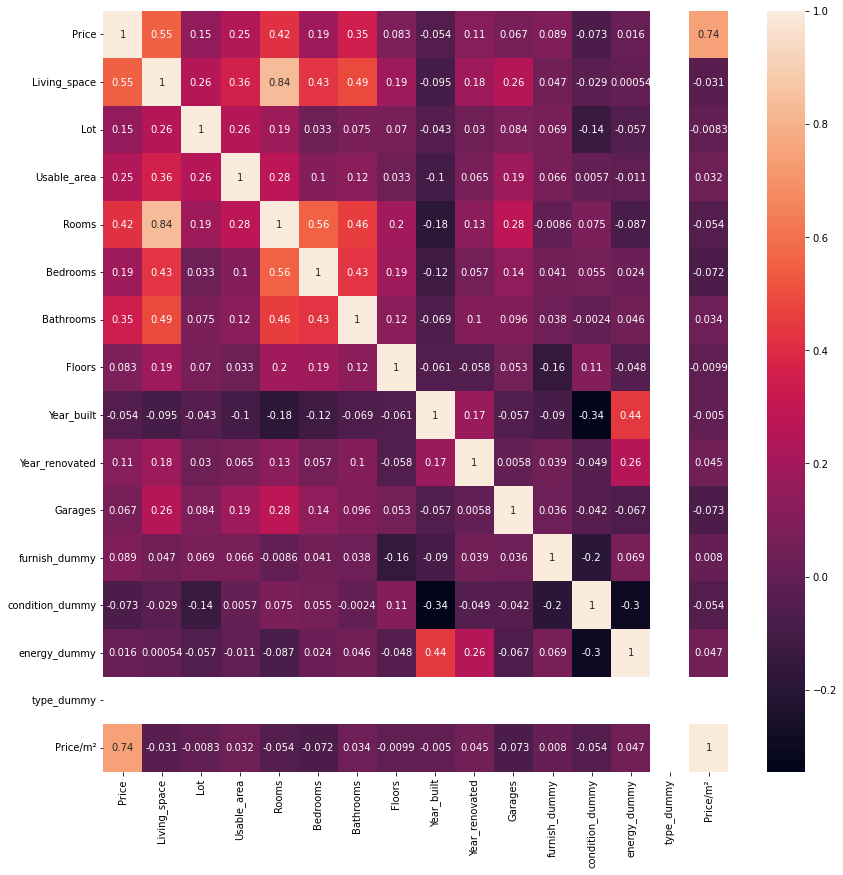

In [241]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_Special.corr(), annot = True, ax = ax)

In [44]:
# subsetting "Type"
df_Villa = df.loc[df['Type']==('Villa')]

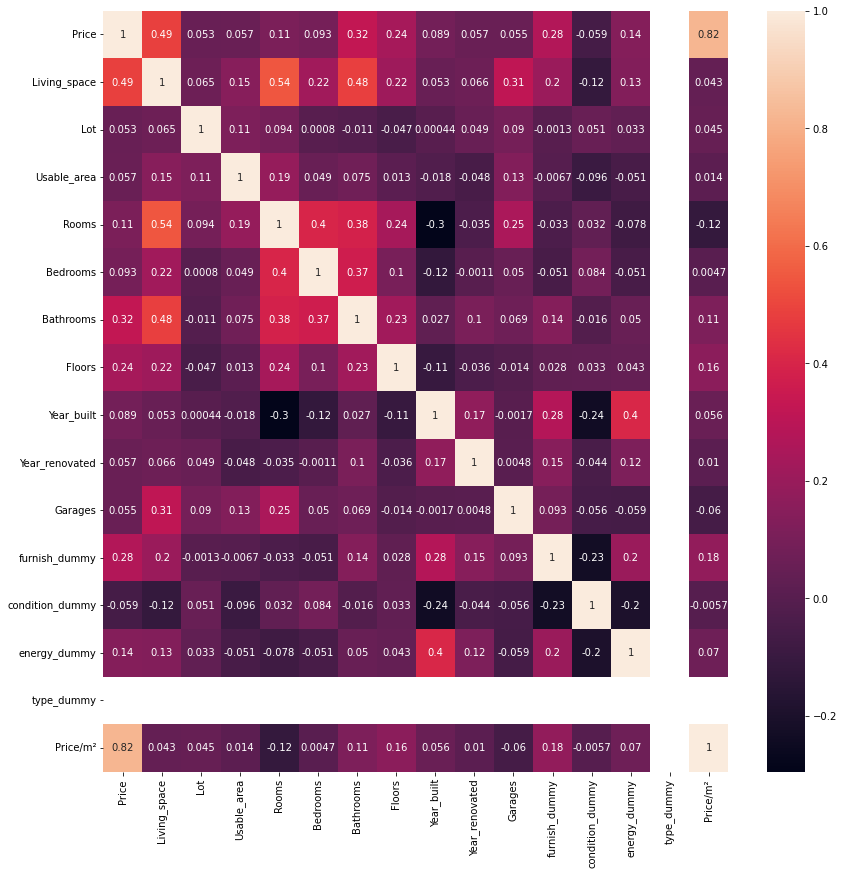

In [243]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_Villa.corr(), annot = True, ax = ax)

## 4aa. Regression for Castle

#### Because the count for castle is just 7 every regression would have too few data points and would not tell us anything.

## 4ab. Regression Farmhouse

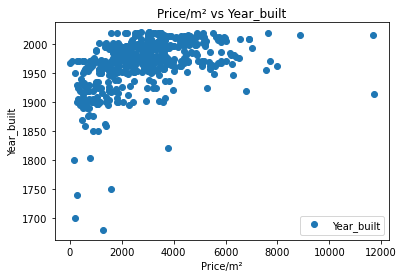

In [45]:
# Create a scatterplot 'Price/maxm²' vs. 'Year_built'

df_Farmhouse.plot(x = 'Price/maxm²', y='Year_built',style='o')
plt.title('Price/m² vs Year_built')  
plt.xlabel('Price/m²')  
plt.ylabel('Year_built')  
plt.show()

In [46]:
# Reshape the variables into NumPy arrays.

X = df_Farmhouse['Year_built'].values.reshape(-1,1)
y = df_Farmhouse['Price/maxm²'].values.reshape(-1,1)

In [47]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
# Create a regression object.

regression = LinearRegression()

In [49]:
# Fit the regression object onto the training set Price Living_space

regression.fit(X_train, y_train)

LinearRegression()

In [50]:
# Predict the values of y using X Price Living_space

y_predicted = regression.predict(X_test)

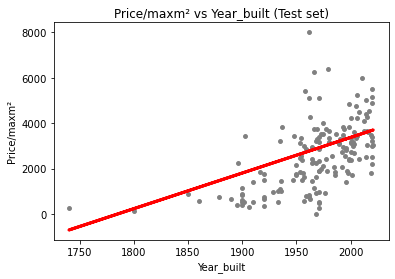

In [51]:
# Create a regression plot from the model on the test set Price Living_space.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price/maxm² vs Year_built (Test set)')
plot_test.xlabel('Year_built')
plot_test.ylabel('Price/maxm²')
plot_test.show()

In [52]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [53]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[15.66947073]]
Mean squared error:  1577830.70519465
R2 score:  0.2632614842724226


#### Low r2 for Type Farmhouse Test Set Year_built -> Price/m²

In [54]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

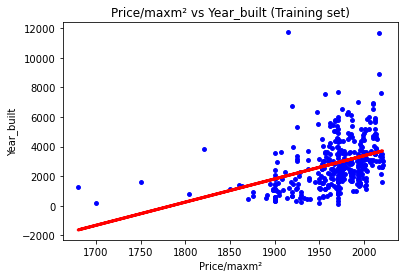

In [55]:
# Create a regression plot from the model on the test set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price/maxm² vs Year_built (Training set)')
plot_test.xlabel('Price/maxm²')
plot_test.ylabel('Year_built')
plot_test.show()

In [56]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[15.66947073]]
Mean squared error:  2491336.498322258
R2 score:  0.15657186551476776


#### Even lower r2 for Training set

## 04ac. Regression Multiple dwelling

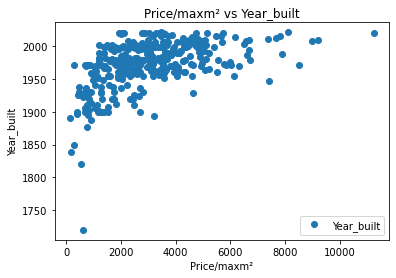

In [58]:
# Create a scatterplot 'Price/maxm²' vs. 'Year_built'

df_multiple.plot(x = 'Price/maxm²', y='Year_built',style='o')
plt.title('Price/maxm² vs Year_built')  
plt.xlabel('Price/maxm²')  
plt.ylabel('Year_built')  
plt.show()

In [59]:
# Drop 1 outsider
df_m2 = df_multiple[df_multiple['Year_built'] > 1800]

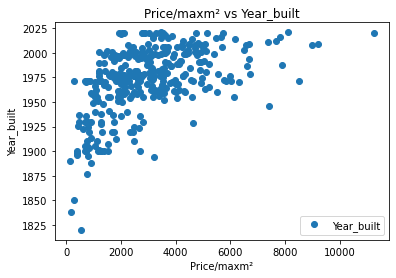

In [60]:
# Create a scatterplot 'Price/m²' vs. 'Year_built'

df_m2.plot(x = 'Price/maxm²', y='Year_built',style='o')
plt.title('Price/maxm² vs Year_built')  
plt.xlabel('Price/maxm²')  
plt.ylabel('Year_built')  
plt.show()

In [61]:
# Reshape the variables into NumPy arrays

X = df_m2['Year_built'].values.reshape(-1,1)
y = df_m2['Price/maxm²'].values.reshape(-1,1)

In [62]:
# Split data into a training set and a test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [63]:
# Create a regression object.

regression = LinearRegression()

In [64]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

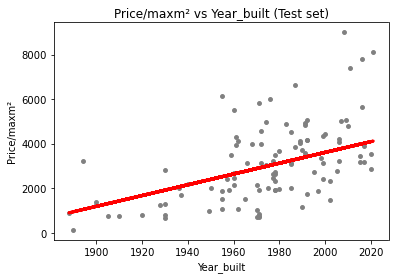

In [66]:
# Create a regression plot from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price/maxm² vs Year_built (Test set)')
plot_test.xlabel('Year_built')
plot_test.ylabel('Price/maxm²')
plot_test.show()

In [67]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [68]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[24.2261052]]
Mean squared error:  2207576.0224946802
R2 score:  0.2812363235323124


#### Also low R2.

In [69]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

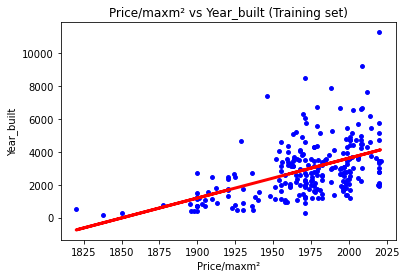

In [70]:
# Create a regression plot from the model on the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price/maxm² vs Year_built (Training set)')
plot_test.xlabel('Price/maxm²')
plot_test.ylabel('Year_built')
plot_test.show()

In [71]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [72]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[24.2261052]]
Mean squared error:  2221632.2281406233
R2 score:  0.25107298145008694


#### Even lower r²

## 04ad. Regression Single dwelling

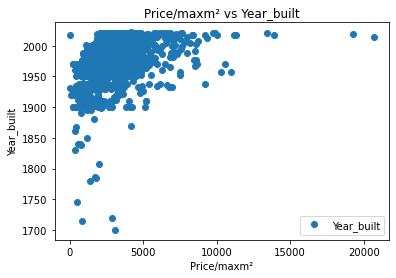

In [73]:
# Create a scatterplot 'Price/m²' vs. 'Year_built'

df_Single.plot(x = 'Price/maxm²', y='Year_built',style='o')
plt.title('Price/maxm² vs Year_built')  
plt.xlabel('Price/maxm²')  
plt.ylabel('Year_built')  
plt.show()

In [74]:
# Drop ouliers, I include only buildings after 1890
df_Single2 = df_Single[df_Single['Year_built'] > 1890]

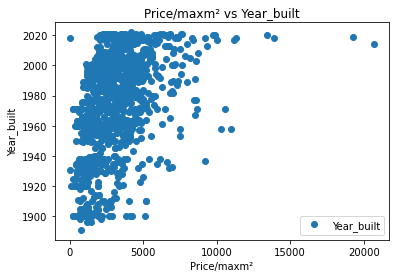

In [75]:
# Create a scatterplot 'Price/m²' vs. 'Year_built'

df_Single2.plot(x = 'Price/maxm²', y='Year_built',style='o')
plt.title('Price/maxm² vs Year_built')  
plt.xlabel('Price/maxm²')  
plt.ylabel('Year_built')  
plt.show()

In [76]:
# Reshape the variables into NumPy arrays

X = df_Single2['Year_built'].values.reshape(-1,1)
y = df_Single2['Price/maxm²'].values.reshape(-1,1)

In [77]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
# Create a regression object.

regression = LinearRegression()

In [79]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [80]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

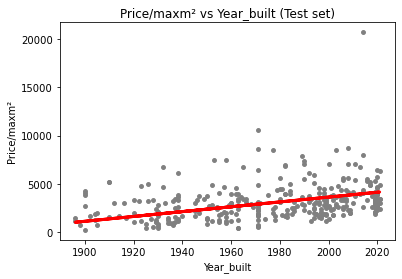

In [81]:
# Create a regression plot from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price/maxm² vs Year_built (Test set)')
plot_test.xlabel('Year_built')
plot_test.ylabel('Price/maxm²')
plot_test.show()

In [82]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [83]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[25.08431388]]
Mean squared error:  3666885.569023114
R2 score:  0.0670972449669347


#### Single dwelling have the lowest r²

In [84]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

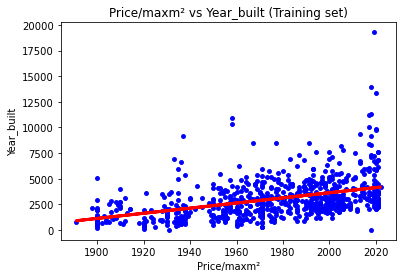

In [85]:
# Create a regression plot from the model on the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price/maxm² vs Year_built (Training set)')
plot_test.xlabel('Price/maxm²')
plot_test.ylabel('Year_built')
plot_test.show()

In [86]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [87]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[25.08431388]]
Mean squared error:  3129914.3171939594
R2 score:  0.17912486520700222


#### Training Set is a little better

## 04ae. Regression: Lets have a look at that weird correlation of Duplex of Price/m² and Price

In [301]:
df_Duplex

Price    Type  Living_space     Lot  Usable_area  Free_of_Relation  \
7       630000.0  Duplex        263.00   406.0        118.0       01.04.2020    
8       364000.0  Duplex        227.00   973.0         83.0   nach Absprache    
11      470000.0  Duplex        268.00  1511.0         52.0               NaN   
14      720000.0  Duplex        310.92   772.0         80.0               NaN   
15     1100000.0  Duplex        230.00   526.0         47.0   nach Absprache    
...          ...     ...           ...     ...          ...               ...   
10522    60000.0  Duplex        160.00  1364.0        100.0       01.09.2019    
10529   269000.0  Duplex        216.40  1350.0         80.0               NaN   
10530  1800000.0  Duplex       1200.00  2500.0         80.0               NaN   
10537   472500.0  Duplex        485.00   320.0        135.0           sofort    
10538    99000.0  Duplex        300.00   850.0        150.0           sofort    

       Rooms  Bedrooms  Bathrooms  Floors  Year_built Furnishing_quality  \
7       10.0       4.0        2.0     3.0      1989.0              basic   
8       10.0       4.0        4.0     2.0      1809.0             normal   
11      12.0       9.0        3.0     3.0      1976.0              basic   
14       9.0       4.0        3.0     2.0      1978.0            refined   
15       7.0       3.0        3.0     2.0      1914.0                NaN   
...      ...       ...        ...     ...         ...                ...   
10522    8.0       4.0        2.0     3.0      1890.0            refined   
10529    8.0       5.0        3.0     3.0      1971.0                NaN   
10530   72.0       4.0        2.0     4.0      2005.0                NaN   
10537   15.0      11.0        4.0     3.0      1906.0                NaN   
10538   12.0       4.0        4.0     3.0      1833.0             normal   

       Year_renovated                             Condition  \
7                 NaN                            modernized   
8              2015.0                            modernized   
11                NaN                            modernized   
14                NaN                           refurbished   
15             1995.0                            maintained   
...               ...                                   ...   
10522          2008.0                            modernized   
10529          2014.0                      first occupation   
10530          2005.0  first occupation after refurbishment   
10537          2010.0                           fixer-upper   
10538          2016.0                           fixer-upper   

                    Heating    Energy_source        Energy_certificate  \
7             stove heating             Gas                  available   
8           central heating           Strom                  available   
11            stove heating              Öl                  available   
14            stove heating              Öl                  available   
15          central heating           Strom                  available   
...                     ...              ...                       ...   
10522             heat pump             Gas                        NaN   
10529         stove heating             Gas   available for inspection   
10530         stove heating   Erdgas leicht                  available   
10537         stove heating             Gas                  available   
10538  night storage heater             Gas                  available   

       Energy_certificate_type Energy_efficiency_class              State  \
7           demand certificate                      E   Baden-Württemberg   
8      consumption certificate                      F   Baden-Württemberg   
11          demand certificate                      D   Baden-Württemberg   
14     consumption certificate                      B   Baden-Württemberg   
15          demand certificate                      F   Baden-Württemberg   
...              

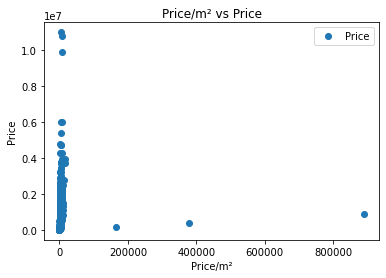

In [292]:
# Create a scatterplot 'Price/m²' vs. 'Price'

df_Duplex.plot(x = 'Price/m²', y='Price',style='o')
plt.title('Price/m² vs Price')  
plt.xlabel('Price/m²')  
plt.ylabel('Price')  
plt.show()

In [307]:
# Drop the outliers
df_D2 = df_Duplex[df_Duplex['Price'] < 8000000]

In [308]:
# Drop the outliers
df_D2 = df_Duplex[df_Duplex['Price/m²'] < 100000]

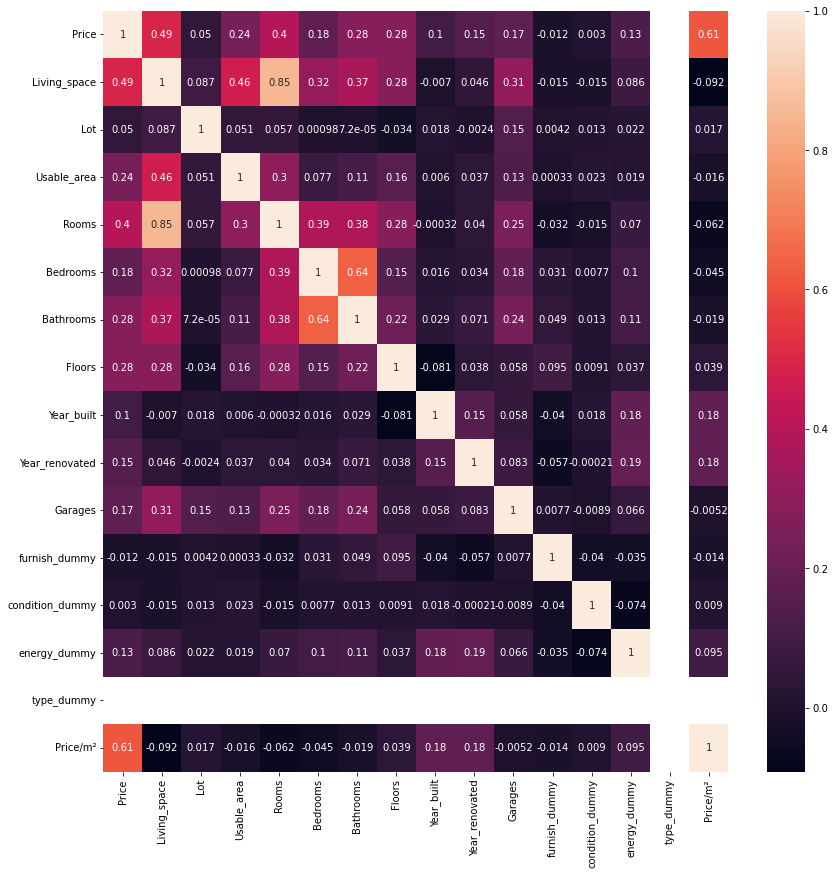

In [318]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_D2.corr(), annot = True, ax = ax)

#### It seems the outliers were the problem with correlation.

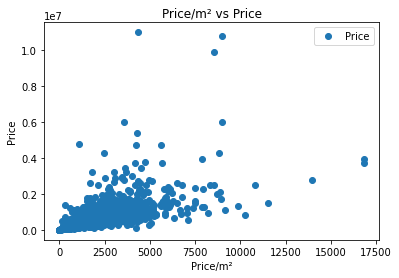

In [309]:
# Create a scatterplot 'Price/m²' vs. 'Price'

df_D2.plot(x = 'Price/m²', y='Price',style='o')
plt.title('Price/m² vs Price')  
plt.xlabel('Price/m²')  
plt.ylabel('Price')  
plt.show()

In [310]:
# Reshape the variables into NumPy arrays

X = df_Duplex['Price/m²'].values.reshape(-1,1)
y = df_Duplex['Price'].values.reshape(-1,1)

In [311]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [312]:
# Create a regression object.

regression = LinearRegression()

In [313]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [314]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

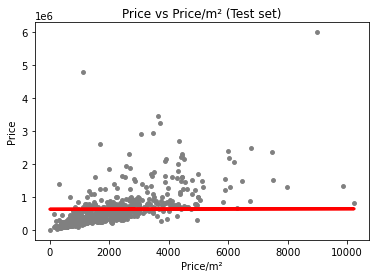

In [315]:
# Create a regression plot from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Price/m² (Test set)')
plot_test.xlabel('Price/m²')
plot_test.ylabel('Price')
plot_test.show()

In [316]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [317]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.10006215]]
Mean squared error:  326245130501.05945
R2 score:  0.003061986545687234


#### Again poor r2

## 04b. Regression with price/m² and building year 1900 - 2020

In [95]:
df.head()

Price               Type  Living_space    Lot  Usable_area  \
0   498000.0  Multiple dwelling        106.00  229.0         80.0   
1   495000.0  Mid-terrace house        140.93  517.0         20.0   
3   259000.0          Farmhouse        140.00  814.0         80.0   
4   469000.0  Multiple dwelling        115.00  244.0         80.0   
5  1400000.0  Mid-terrace house        310.00  860.0        100.0   

      Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
0          01.10.2020     5.5       3.0        1.0     2.0      2005.0   
1          01.01.2021     6.0       3.0        2.0     2.0      1994.0   
3   nach Vereinbarung     4.0       4.0        2.0     2.0      1900.0   
4              sofort     4.5       2.0        1.0     2.0      1968.0   
5              sofort     8.0       4.0        2.0     3.0      1969.0   

  Furnishing_quality  Year_renovated    Condition          Heating  \
0             normal             NaN   modernized  central heating   
1              basic             NaN   modernized    stove heating   
3              basic          2000.0  fixer-upper  central heating   
4            refined          2019.0  refurbished  central heating   
5              basic             NaN   maintained              NaN   

  Energy_source   Energy_certificate  Energy_certificate_type  \
0          Gas             available       demand certificate   
1           NaN  not required by law                      NaN   
3        Strom             available       demand certificate   
4           Öl             available       demand certificate   
5           Öl             available  consumption certificate   

  Energy_efficiency_class              State               City  \
0                      D   Baden-Württemberg      Bodenseekreis   
1                     NaN  Baden-Württemberg   Konstanz (Kreis)   
3                      G   Baden-Württemberg   Waldshut (Kreis)   
4                      F   Baden-Württemberg  Esslingen (Kreis)   
5                     NaN  Baden-Württemberg          Stuttgart   

                     Place  Garages   Garagetype;  furnish_dummy  \
0              Bermatingen      2.0  Parking lot;            2.0   
1                    Engen      7.0  Parking lot;            1.0   
3  Bonndorf im Schwarzwald      1.0       Garage;            1.0   
4  Leinfelden-Echterdingen      1.0       Garage;            3.0   
5                      Süd      2.0       Garage;            1.0   

   condition_dummy  energy_dummy  type_dummy     Price/m²  
0              5.0           5.0         7.0  4698.113208  
1              5.0           4.0         1.0  3512.382034  
3              2.0           2.0         4.0  1850.000000  
4              4.0           3.0         7.0  4078.260870  
5              3.0           4.0         1.0  4516.129032

In [88]:
# subsetting new df_yb
df_yb = df[(df['Year_built']>1899) & (df['Year_built'] < 2021)]

In [89]:
df_yb

Price               Type  Living_space     Lot  Usable_area  \
0       498000.0  Multiple dwelling        106.00   229.0         80.0   
1       495000.0  Mid-terrace house        140.93   517.0         20.0   
3       259000.0          Farmhouse        140.00   814.0         80.0   
4       469000.0  Multiple dwelling        115.00   244.0         80.0   
5      1400000.0  Mid-terrace house        310.00   860.0        100.0   
...          ...                ...           ...     ...          ...   
10533    35000.0          Farmhouse        200.00   371.0        400.0   
10534    35500.0   Special property         47.00  1400.0         80.0   
10535    38000.0          Farmhouse        110.00   471.0        110.0   
10536   348000.0                NaN        200.00  1610.0        650.0   
10537   472500.0             Duplex        485.00   320.0        135.0   

          Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
0              01.10.2020     5.5       3.0        1.0     2.0      2005.0   
1              01.01.2021     6.0       3.0        2.0     2.0      1994.0   
3       nach Vereinbarung     4.0       4.0        2.0     2.0      1900.0   
4                  sofort     4.5       2.0        1.0     2.0      1968.0   
5                  sofort     8.0       4.0        2.0     3.0      1969.0   
...                    ...    ...       ...        ...     ...         ...   
10533              sofort     8.0       4.0        2.0     3.0      1971.0   
10534              sofort     2.0       1.0        1.0     1.0      1985.0   
10535              sofort     5.0       2.0        1.0     3.0      1900.0   
10536              sofort     7.0       5.0        2.0     2.0      1974.0   
10537              sofort    15.0      11.0        4.0     3.0      1906.0   

      Furnishing_quality  Year_renovated    Condition             Heating  \
0                 normal             NaN   modernized     central heating   
1                  basic             NaN   modernized       stove heating   
3                  basic          2000.0  fixer-upper     central heating   
4                refined          2019.0  refurbished     central heating   
5                  basic             NaN   maintained                 NaN   
...                  ...             ...          ...                 ...   
10533            refined             NaN  refurbished  underfloor heating   
10534            refined             NaN   maintained     central heating   
10535            refined          1995.0  refurbished       stove heating   
10536             normal          1996.0    renovated       stove heating   
10537                NaN          2010.0  fixer-upper       stove heating   

      Energy_source        Energy_certificate  Energy_certificate_type  \
0              Gas                  available       demand certificate   
1               NaN       not required by law                      NaN   
3            Strom                  available       demand certificate   
4               Öl                  available       demand certificate   
5               Öl                  available  consumption certificate   
...             ...                       ...                      ...   
10533         Holz                        NaN                      NaN   
10534          Gas   available for inspection                      NaN   
10535          Gas   available for inspection                      NaN   
10536           Öl   available for inspection                      NaN   
10537          Gas                  available       demand certificate   

      Energy_efficiency_class              State                   City  \
0                          D   Baden-Württemberg          Bodenseekreis   
1                         NaN  Baden-Württemberg       Konstanz (Kreis)   
3                          G   Baden-Württemberg       Waldshut (Kreis)   
4                          F   Baden-Württemberg      Esslingen (Kreis)

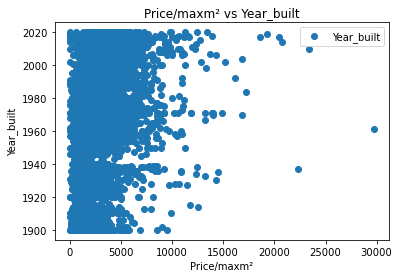

In [90]:
# Create a scatterplot 'Price/m²' vs. 'Year_built'

df_yb.plot(x = 'Price/maxm²', y='Year_built',style='o')
plt.title('Price/maxm² vs Year_built')  
plt.xlabel('Price/maxm²')  
plt.ylabel('Year_built')  
plt.show()

In [92]:
# dropping the outliers
df_yb2 = df_yb[df_yb['Price/maxm²'] < 100000]

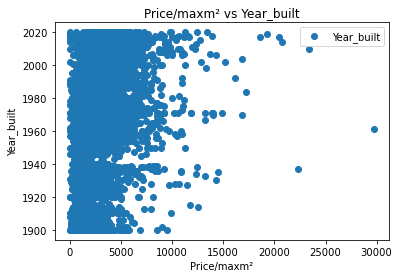

In [93]:
# Create a scatterplot 'Price/m²' vs. 'Year_built'

df_yb2.plot(x = 'Price/maxm²', y='Year_built',style='o')
plt.title('Price/maxm² vs Year_built')  
plt.xlabel('Price/maxm²')  
plt.ylabel('Year_built')  
plt.show()

In [94]:
# Reshape the variables into NumPy arrays Price Living_space.

X = df_yb2['Year_built'].values.reshape(-1,1)
y = df_yb2['Price/maxm²'].values.reshape(-1,1)

In [95]:
# Split data into a training set and a test set Price Living_space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [96]:
# Create a regression object.

regression = LinearRegression()

In [97]:
# Fit the regression object onto the training set Price Living_space

regression.fit(X_train, y_train)

LinearRegression()

In [98]:
# Predict the values of y using X Price Living_space

y_predicted = regression.predict(X_test)

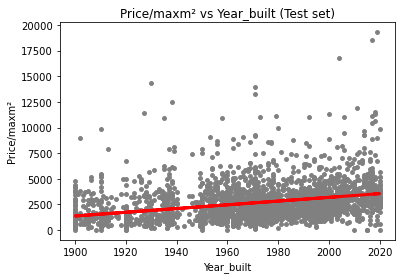

In [99]:
# Create a regression plot from the model on the test set Price Living_space.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price/maxm² vs Year_built (Test set)')
plot_test.xlabel('Year_built')
plot_test.ylabel('Price/maxm²')
plot_test.show()

In [100]:
# Create objects that contain the model summary statistics, Price Living_space.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [101]:
# Print the model summary statistics, Price Living_space.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[18.18924566]]
Mean squared error:  3094680.5468662633
R2 score:  0.08109831098777265


#### Low r²

## 04c. Regression with Year_renovated from 1990-2020

In [102]:
# subsetting new df_yb and NO NaN
df_yr = df[(df['Year_renovated']>1989) & (df['Year_renovated'] < 2021)]

In [119]:
df_yr

Price               Type  Living_space     Lot  Usable_area  \
3       259000.0          Farmhouse         140.0   814.0         80.0   
4       469000.0  Multiple dwelling         115.0   244.0         80.0   
8       364000.0             Duplex         227.0   973.0         83.0   
10     1750000.0  Mid-terrace house         210.0  1460.0         70.0   
15     1100000.0             Duplex         230.0   526.0         47.0   
...          ...                ...           ...     ...          ...   
10532   312700.0           Bungalow         310.0   989.0        310.0   
10535    38000.0          Farmhouse         110.0   471.0        110.0   
10536   348000.0                NaN         200.0  1610.0        650.0   
10537   472500.0             Duplex         485.0   320.0        135.0   
10538    99000.0             Duplex         300.0   850.0        150.0   

          Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
3       nach Vereinbarung     4.0       4.0        2.0     2.0      1900.0   
4                  sofort     4.5       2.0        1.0     2.0      1968.0   
8          nach Absprache    10.0       4.0        4.0     2.0      1809.0   
10      Nach Vereinbarung     6.0       4.0        2.0     3.0      1939.0   
15         nach Absprache     7.0       3.0        3.0     2.0      1914.0   
...                    ...    ...       ...        ...     ...         ...   
10532           ab sofort    15.0       4.0        2.0     2.0      1994.0   
10535              sofort     5.0       2.0        1.0     3.0      1900.0   
10536              sofort     7.0       5.0        2.0     2.0      1974.0   
10537              sofort    15.0      11.0        4.0     3.0      1906.0   
10538              sofort    12.0       4.0        4.0     3.0      1833.0   

      Furnishing_quality  Year_renovated  \
3                  basic          2000.0   
4                refined          2019.0   
8                 normal          2015.0   
10                normal          2014.0   
15                   NaN          1995.0   
...                  ...             ...   
10532                NaN          2015.0   
10535            refined          1995.0   
10536             normal          1996.0   
10537                NaN          2010.0   
10538             normal          2016.0   

                                  Condition               Heating  \
3                               fixer-upper       central heating   
4                               refurbished       central heating   
8                                modernized       central heating   
10                               modernized         stove heating   
15                               maintained       central heating   
...                                     ...                   ...   
10532  first occupation after refurbishment           oil heating   
10535                           refurbished         stove heating   
10536                             renovated         stove heating   
10537                           fixer-upper         stove heating   
10538                           fixer-upper  night storage heater   

      Energy_source        Energy_certificate  Energy_certificate_type  \
3            Strom                  available       demand certificate   
4               Öl                  available       demand certificate   
8            Strom                  available  consumption certificate   
10              Öl                  available  consumption certificate   
15           Strom                  available       demand certificate   
...             ...                       ...                      ...   
10532          Gas                  available       demand certificate   
10535          Gas   available for inspection                      NaN   
10536           Öl   available for inspection                      NaN   
10537          Gas                  available       demand certificate   
10538        

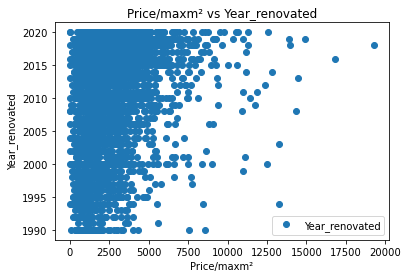

In [103]:
# Create a scatterplot 'Price/m²' vs. 'Year_renovated'

df_yr.plot(x = 'Price/maxm²', y='Year_renovated',style='o')
plt.title('Price/maxm² vs Year_renovated')  
plt.xlabel('Price/maxm²')  
plt.ylabel('Year_renovated')  
plt.show()

In [104]:
# Reshape the variables into NumPy arrays Price Living_space.

X = df_yr['Year_renovated'].values.reshape(-1,1)
y = df_yr['Price/maxm²'].values.reshape(-1,1)

In [105]:
# Split data into a training set and a test set Price Living_space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [106]:
# Create a regression object.

regression = LinearRegression()

In [107]:
# Fit the regression object onto the training set Price Living_space

regression.fit(X_train, y_train)

LinearRegression()

In [108]:
# Predict the values of y using X Price Living_space

y_predicted = regression.predict(X_test)

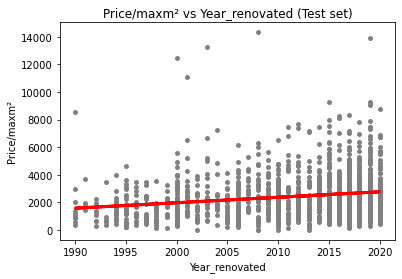

In [109]:
# Create a regression plot from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price/maxm² vs Year_renovated (Test set)')
plot_test.xlabel('Year_renovated')
plot_test.ylabel('Price/maxm²')
plot_test.show()

In [110]:
# Create objects that contain the model summary statistics, Price Living_space.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [111]:
# Print the model summary statistics, Price Living_space.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[39.5291393]]
Mean squared error:  2686480.0410017744
R2 score:  0.0337669758416308


## 05. Dig a little deeper into the new variable Price/maxm²

In [29]:
df.head()

Price               Type  Living_space    Lot  Usable_area  \
0   498000.0  Multiple dwelling        106.00  229.0         80.0   
1   495000.0  Mid-terrace house        140.93  517.0         20.0   
3   259000.0          Farmhouse        140.00  814.0         80.0   
4   469000.0  Multiple dwelling        115.00  244.0         80.0   
5  1400000.0  Mid-terrace house        310.00  860.0        100.0   

      Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
0          01.10.2020     5.5       3.0        1.0     2.0      2005.0   
1          01.01.2021     6.0       3.0        2.0     2.0      1994.0   
3   nach Vereinbarung     4.0       4.0        2.0     2.0      1900.0   
4              sofort     4.5       2.0        1.0     2.0      1968.0   
5              sofort     8.0       4.0        2.0     3.0      1969.0   

  Furnishing_quality  Year_renovated    Condition          Heating  \
0             normal             NaN   modernized  central heating   
1              basic             NaN   modernized    stove heating   
3              basic          2000.0  fixer-upper  central heating   
4            refined          2019.0  refurbished  central heating   
5              basic             NaN   maintained              NaN   

  Energy_source   Energy_certificate  Energy_certificate_type  \
0          Gas             available       demand certificate   
1           NaN  not required by law                      NaN   
3        Strom             available       demand certificate   
4           Öl             available       demand certificate   
5           Öl             available  consumption certificate   

  Energy_efficiency_class              State               City  \
0                      D   Baden-Württemberg      Bodenseekreis   
1                     NaN  Baden-Württemberg   Konstanz (Kreis)   
3                      G   Baden-Württemberg   Waldshut (Kreis)   
4                      F   Baden-Württemberg  Esslingen (Kreis)   
5                     NaN  Baden-Württemberg          Stuttgart   

                     Place  Garages   Garagetype;  furnish_dummy  \
0              Bermatingen      2.0  Parking lot;            2.0   
1                    Engen      7.0  Parking lot;            1.0   
3  Bonndorf im Schwarzwald      1.0       Garage;            1.0   
4  Leinfelden-Echterdingen      1.0       Garage;            3.0   
5                      Süd      2.0       Garage;            1.0   

   condition_dummy  energy_dummy  type_dummy  Price/uam²   m²max  m²min  \
0              5.0           5.0         7.0      6225.0  106.00   80.0   
1              5.0           4.0         1.0     24750.0  140.93   20.0   
3              2.0           2.0         4.0      3237.5  140.00   80.0   
4              4.0           3.0         7.0      5862.5  115.00   80.0   
5              3.0           4.0         1.0     14000.0  310.00  100.0   

   Price/maxm²  Price/minm²   Price/lsm²  
0  4698.113208       6225.0  4698.113208  
1  3512.382034      24750.0  3512.382034  
3  1850.000000       3237.5  1850.000000  
4  4078.260870       5862.5  4078.260870  
5  4516.129032      14000.0  4516.129032

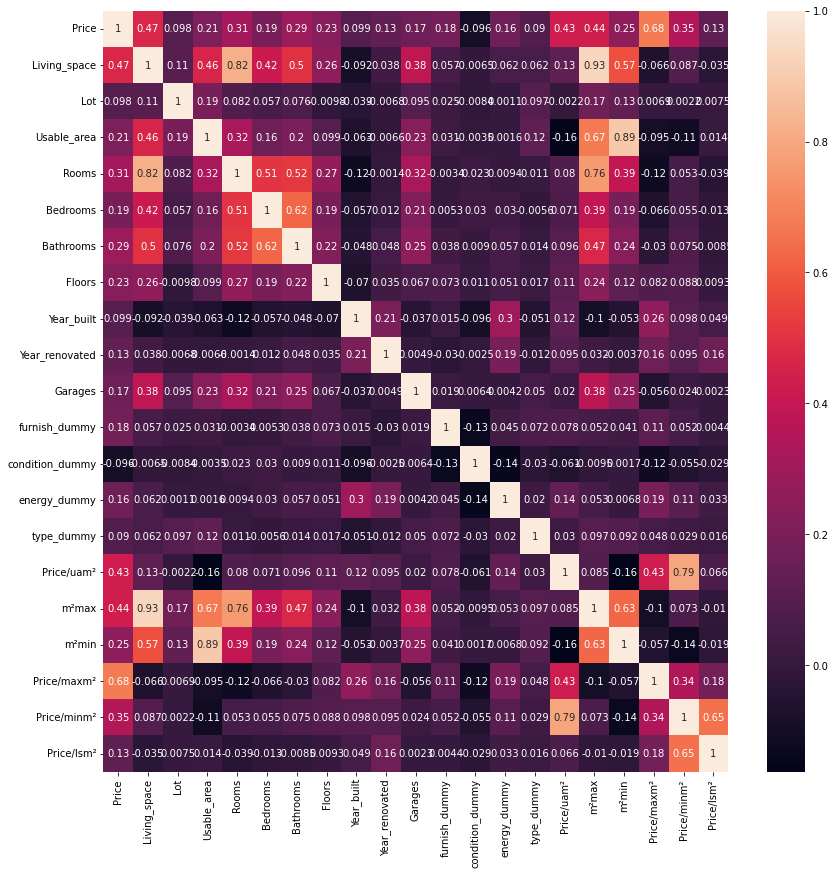

In [30]:
# creating correlation heapmap with seaborn
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df.corr(), annot = True, ax = ax)

#### One can see, if we combine price and max livingspace or usablearea in Price/maxm² then there is not much correlation left with the remaining variables. So again, it seems that the variables are not very good predictors for the price.

In [31]:
df.groupby('Type').agg({'Price/maxm²': ['count','mean','min','max']}).applymap('{:.2f}'.format)

Price/maxm²                           
                           count     mean     min       max
Type                                                       
Bungalow                  239.00  2424.98  211.88  11450.00
Castle                      7.00  1575.40  372.50   4559.27
Corner house              177.00  1824.62    0.00  22992.70
Duplex                   1980.00  2001.96    0.00  16818.18
Farmhouse                 544.00  2771.23    0.00  11727.27
Mid-terrace house        3979.00  2617.73    0.00  23421.05
Multiple dwelling         356.00  2970.33  125.00  11265.37
Residential property      351.00  2385.87    0.00  11949.69
Single dwelling          1109.00  3066.88    0.00  20714.29
Special property          330.00  3023.85  150.00   8952.10
Villa                     362.00  4141.58    0.00  29757.79

In [32]:
df.groupby('State').agg({'Price/maxm²': ['count','mean','min','max']}).applymap('{:.2f}'.format)

Price/maxm²                            
                             count     mean      min       max
State                                                         
Baden-Württemberg          1215.00  3146.87     0.00  29757.79
Bayern                     1209.00  3748.04   272.22  18571.43
Berlin                      198.00  4936.98   468.75  22992.70
Brandenburg                 447.00  2630.34     0.00  11309.52
Bremen                       49.00  2773.81  1151.92   6299.21
Hamburg                      44.00  5044.62  2375.00  15151.52
Hessen                      912.00  2947.18     0.00  13958.33
Mecklenburg-Vorpommern      353.00  1865.10     0.00  12820.78
Niedersachsen              1203.00  1997.27     0.00  16818.18
Nordrhein-Westfalen        1571.00  2511.13     0.00  11000.00
Rheinland-Pfalz             941.00  1908.13     0.00  14256.41
Saarland                    160.00  1323.84     0.00   4182.33
Sachsen                     508.00  1395.44     0.00   8152.17
Sachsen-Anhalt              347.00  1080.79     0.00   4730.29
Schleswig-Holstein          526.00  2975.91     0.00  23421.05
Thüringen                   132.00  1236.33    87.50   6000.00

In [33]:
df.groupby('City').agg({'Price/maxm²': ['count','mean','min','max']}).applymap('{:.2f}'.format)

Price/maxm²                           
                                count     mean      min      max
City                                                            
Aachen                           5.00  4067.82  2777.78  6590.96
Aachen (Kreis)                  45.00  2047.21   869.52  4218.75
Adlershof (Treptow)              2.00  2854.17  1875.00  3833.33
Ahrweiler (Kreis)               22.00  1883.29   734.57  3926.67
Aichach-Friedberg (Kreis)       25.00  4531.39  2431.36  9666.67
...                               ...      ...      ...      ...
Zehlendorf (Zehlendorf)          9.00  6465.66  3988.60  8200.59
Zollernalbkreis                 36.00  2510.08   718.89  5272.00
Zweibrücken                      5.00  1191.32   453.12  1500.00
Zwickau                          7.00  1957.48   882.35  3426.97
Zwickau (Kreis)                 36.00  1115.27   150.00  2931.25

[530 rows x 4 columns]

## 06 K-means clustering

## 06a K-means clustering with Price/m²

In [37]:
# Dropping all categorical variables
df_k = df.drop (columns = ['Type', 'Free_of_Relation', 'Furnishing_quality', 'Condition', 'Heating', 'Energy_source', 'Energy_certificate', 'Energy_certificate_type', 'Energy_efficiency_class', 'State', 'City', 'Place', 'Garagetype;','type_dummy','Year_renovated'])

In [38]:
df_k

Price  Living_space     Lot  Usable_area  Rooms  Bedrooms  \
0       498000.0        106.00   229.0         80.0    5.5       3.0   
1       495000.0        140.93   517.0         20.0    6.0       3.0   
3       259000.0        140.00   814.0         80.0    4.0       4.0   
4       469000.0        115.00   244.0         80.0    4.5       2.0   
5      1400000.0        310.00   860.0        100.0    8.0       4.0   
...          ...           ...     ...          ...    ...       ...   
10534    35500.0         47.00  1400.0         80.0    2.0       1.0   
10535    38000.0        110.00   471.0        110.0    5.0       2.0   
10536   348000.0        200.00  1610.0        650.0    7.0       5.0   
10537   472500.0        485.00   320.0        135.0   15.0      11.0   
10538    99000.0        300.00   850.0        150.0   12.0       4.0   

       Bathrooms  Floors  Year_built  Garages  furnish_dummy  condition_dummy  \
0            1.0     2.0      2005.0      2.0            2.0              5.0   
1            2.0     2.0      1994.0      7.0            1.0              5.0   
3            2.0     2.0      1900.0      1.0            1.0              2.0   
4            1.0     2.0      1968.0      1.0            3.0              4.0   
5            2.0     3.0      1969.0      2.0            1.0              3.0   
...          ...     ...         ...      ...            ...              ...   
10534        1.0     1.0      1985.0      1.0            3.0              3.0   
10535        1.0     3.0      1900.0      2.0            3.0              4.0   
10536        2.0     2.0      1974.0      6.0            2.0              6.0   
10537        4.0     3.0      1906.0      4.0            2.0              2.0   
10538        4.0     3.0      1833.0      4.0            2.0              2.0   

       energy_dummy     Price/m²  
0               5.0  4698.113208  
1               4.0  3512.382034  
3               2.0  1850.000000  
4               3.0  4078.260870  
5               4.0  4516.129032  
...             ...          ...  
10534           4.0   755.319149  
10535           4.0   345.454545  
10536           4.0  1740.000000  
10537           4.0   974.226804  
10538           2.0   330.000000  

[9816 rows x 14 columns]

In [44]:
df_k.isnull().sum()

Price              0
Living_space       0
Lot                0
Usable_area        0
Rooms              0
Bedrooms           0
Bathrooms          0
Floors             0
Year_built         0
Garages            0
furnish_dummy      0
condition_dummy    0
energy_dummy       0
Price/m²           0
dtype: int64

In [72]:
# subsetting data without outliers
df_k2 = df_k.loc[df_k['Price/m²']< 100000]

In [60]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_k2)
print(scaled)

[[-0.09225802 -0.66149456 -0.14278235 ...  0.55723133  1.05210848
  -0.35561239]
 [-0.09718364 -0.45171324 -0.10993852 ... -0.06169031  0.43664962
  -0.35561239]
 [-0.48466612 -0.4572986  -0.07606832 ... -1.29953359 -0.42621691
  -0.35561239]
 ...
 [-0.33853925 -0.09695278  0.01470837 ... -0.06169031 -0.48331289
  -0.35561239]
 [-0.13412583  1.61468987 -0.13240461 ... -0.06169031 -0.88079076
  -0.35561239]
 [-0.7473661   0.50362359 -0.07196284 ... -1.29953359 -1.21517945
  -0.35561239]]


In [61]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [62]:
score = [kmeans[i].fit(df_k2).score(df_k2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3640590485513797.0,
 -1777575417692126.8,
 -998086523456993.4,
 -635238817834127.2,
 -415896959269825.4,
 -285134442052292.94,
 -202524843294325.25,
 -159628479862536.47,
 -126301372070032.42]

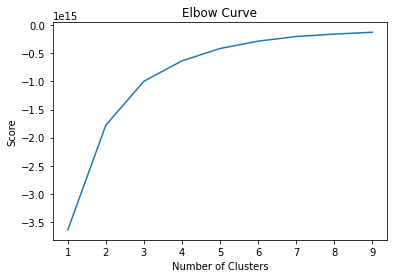

In [63]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Lets try with 3 clusters because after this point the curve straightens out.

In [64]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [65]:
# Fit the k-means object to the data.

kmeans.fit(df_k2)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [66]:
df_k2['clusters'] = kmeans.fit_predict(df_k2)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\lifti\AppData\Local\Temp/ipykernel_8516/2987029560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k2['clusters'] = kmeans.fit_predict(df_k2)


In [67]:
df_k2.head()

Price  Living_space    Lot  Usable_area  Rooms  Bedrooms  Bathrooms  \
0   498000.0        106.00  229.0         80.0    5.5       3.0        1.0   
1   495000.0        140.93  517.0         20.0    6.0       3.0        2.0   
3   259000.0        140.00  814.0         80.0    4.0       4.0        2.0   
4   469000.0        115.00  244.0         80.0    4.5       2.0        1.0   
5  1400000.0        310.00  860.0        100.0    8.0       4.0        2.0   

   Floors  Year_built  Garages  furnish_dummy  condition_dummy  energy_dummy  \
0     2.0      2005.0      2.0            2.0              5.0           5.0   
1     2.0      1994.0      7.0            1.0              5.0           4.0   
3     2.0      1900.0      1.0            1.0              2.0           2.0   
4     2.0      1968.0      1.0            3.0              4.0           3.0   
5     3.0      1969.0      2.0            1.0              3.0           4.0   

      Price/m²  clusters  
0  4698.113208         0  
1  3512.382034         0  
3  1850.000000         0  
4  4078.260870         0  
5  4516.129032         1

In [68]:
df_k2['clusters'].value_counts()

0    8658
1    1089
2      65
Name: clusters, dtype: int64

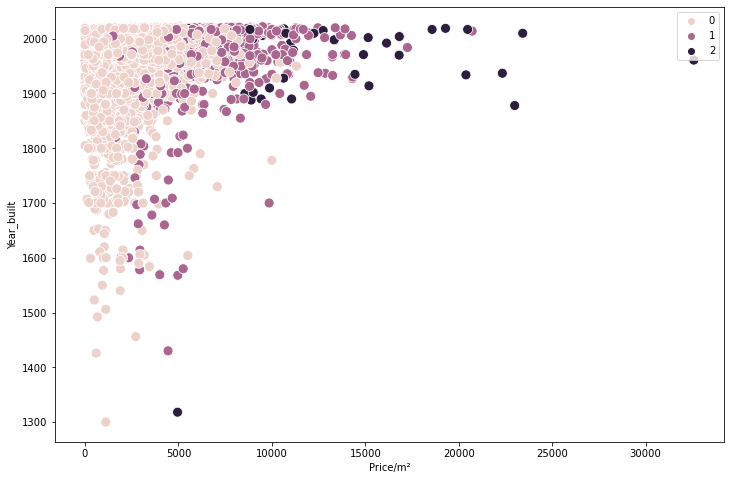

In [69]:
# Plot the clusters for the "Price/m²" and "Year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k2['Price/m²'], y=df_k2['Year_built'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price/m²') # Label x-axis.
plt.ylabel('Year_built') # Label y-axis.
plt.show()

#### As the result seems poor I will subsett just price/m² and building year

In [81]:
# Dropping all categorical variables
df_k3 = df_k2.drop (columns = ['Price','Living_space','Lot','Usable_area','Rooms','Bedrooms','Bathrooms','Floors','Garages','furnish_dummy','condition_dummy','energy_dummy','clusters'])

In [82]:
df_k3

Year_built     Price/m²
0          2005.0  4698.113208
1          1994.0  3512.382034
3          1900.0  1850.000000
4          1968.0  4078.260870
5          1969.0  4516.129032
...           ...          ...
10534      1985.0   755.319149
10535      1900.0   345.454545
10536      1974.0  1740.000000
10537      1906.0   974.226804
10538      1833.0   330.000000

[9812 rows x 2 columns]

In [83]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_k3)
print(scaled)

[[ 0.84451007  1.05210848]
 [ 0.63838518  0.43664962]
 [-1.12304565 -0.42621691]
 ...
 [ 0.26361267 -0.48331289]
 [-1.01061389 -0.88079076]
 [-2.37853359 -1.21517945]]


In [84]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [85]:
score = [kmeans[i].fit(df_k3).score(df_k3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-36447274136.89404,
 -16609957257.135504,
 -9071083763.405396,
 -5780755438.029786,
 -4068464079.879953,
 -2882525528.0791783,
 -2177328701.3199487,
 -1680820227.8761058,
 -1352486055.1052864]

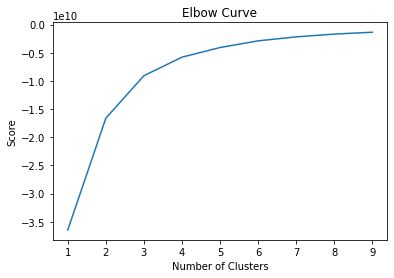

In [86]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [87]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [88]:
# Fit the k-means object to the data.

kmeans.fit(df_k3)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [89]:
df_k3['clusters'] = kmeans.fit_predict(df_k3)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [90]:
df_k3.head()

Year_built     Price/m²  clusters
0      2005.0  4698.113208         0
1      1994.0  3512.382034         0
3      1900.0  1850.000000         1
4      1968.0  4078.260870         0
5      1969.0  4516.129032         0

In [91]:
df_k3['clusters'].value_counts()

1    5741
0    3657
2     414
Name: clusters, dtype: int64

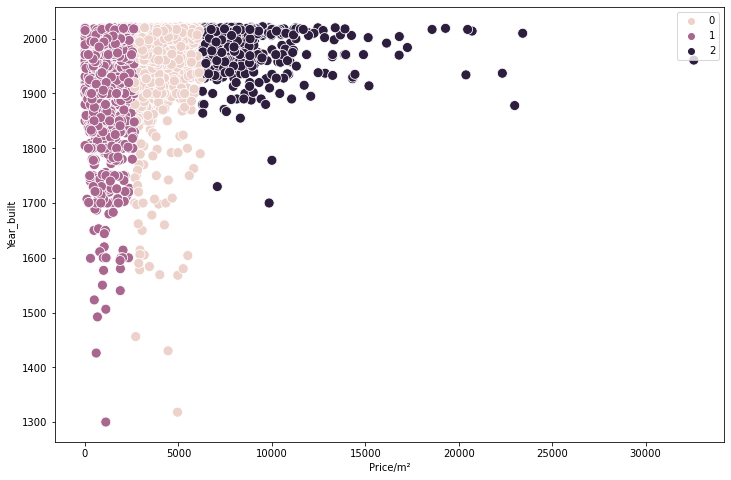

In [92]:
# Plot the clusters for the "Price/m²" and "Year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k3['Price/m²'], y=df_k3['Year_built'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price/m²') # Label x-axis.
plt.ylabel('Year_built') # Label y-axis.
plt.show()

In [94]:
df_k3.groupby('clusters').agg({
    'Price/m²':['mean','median'],
    'Year_built':['mean','median'],
       
})

Price/m²                Year_built        
                 mean       median         mean  median
clusters                                               
0         3787.591810  3556.097561  1974.878589  1981.0
1         1522.427122  1551.020408  1949.121930  1965.0
2         8738.553090  7853.381375  1977.811594  1984.5

## 06b. K-means with year_renovated 1990-2020 and all years.

In [136]:
# Dropping all variables but year_renovated
df_yr2 = df_yr.drop (columns = ['Price','Type','Living_space','Lot','Usable_area','Free_of_Relation','Rooms','Bedrooms','Bathrooms','Floors','Year_built','Furnishing_quality','Condition','Heating','Energy_source','Energy_certificate','Energy_certificate_type','Energy_efficiency_class','State','City','Place','Garages','furnish_dummy','condition_dummy','energy_dummy','Garagetype;','type_dummy'])

In [137]:
df_yr2

Year_renovated     Price/m²
3              2000.0  1850.000000
4              2019.0  4078.260870
8              2015.0  1603.524229
10             2014.0  8333.333333
15             1995.0  4782.608696
...               ...          ...
10532          2015.0  1008.709677
10535          1995.0   345.454545
10536          1996.0  1740.000000
10537          2010.0   974.226804
10538          2016.0   330.000000

[4781 rows x 2 columns]

In [139]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_yr2)
print(scaled)

[[-1.50839775 -0.38231807]
 [ 0.91581482  0.85325639]
 [ 0.40545428 -0.51898931]
 ...
 [-2.01875829 -0.44331326]
 [-0.23249639 -0.86793581]
 [ 0.53304442 -1.22516067]]


In [140]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [142]:
score = [kmeans[i].fit(df_yr2).score(df_yr2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-15549669644.806568,
 -6636986430.360758,
 -3494948671.6895866,
 -2146968791.1051407,
 -1502746122.855777,
 -1023626543.133196,
 -794813535.6349838,
 -611788881.8799111,
 -489732208.1219698]

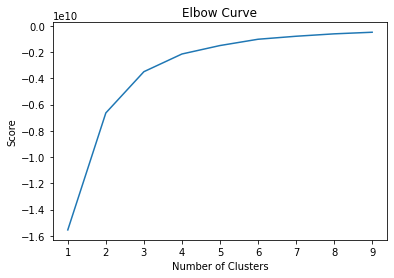

In [143]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Lets start with 3

In [144]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [145]:
# Fit the k-means object to the data.

kmeans.fit(df_yr2)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [146]:
df_yr2['clusters'] = kmeans.fit_predict(df_yr2)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [147]:
df_yr2['clusters'].value_counts()

0    2841
2    1707
1     233
Name: clusters, dtype: int64

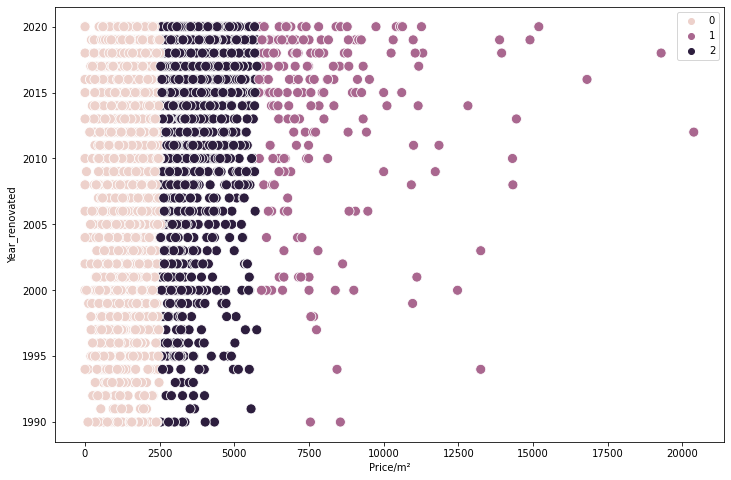

In [149]:
# Plot the clusters for the "Price/m²" and "Year_renovated" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_yr2['Price/m²'], y=df_yr2['Year_renovated'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price/m²') # Label x-axis.
plt.ylabel('Year_renovated') # Label y-axis.
plt.show()

In [151]:
df_yr2.groupby('clusters').agg({
    'Price/m²':['mean','median'],
    'Year_renovated':['mean','median'],
       
})

Price/m²              Year_renovated        
                 mean       median           mean  median
clusters                                                 
0         1459.754051  1469.945355    2010.715593  2014.0
1         7954.636133  7261.410788    2013.721030  2016.0
2         3597.342952  3375.000000    2013.404804  2016.0

#### not much difference regarding the renovation year

## 06c. Lets cluster year_built and year_renovated

In [152]:
# Dropping all variables but year_renovated 
df_yrb = df_yr.drop (columns = ['Price','Type','Living_space','Lot','Usable_area','Free_of_Relation','Rooms','Bedrooms','Bathrooms','Floors','Furnishing_quality','Condition','Heating','Energy_source','Energy_certificate','Energy_certificate_type','Energy_efficiency_class','State','City','Place','Garages','furnish_dummy','condition_dummy','energy_dummy','Garagetype;','type_dummy'])

In [154]:
# now we have just renovated houses
df_yrb

Year_built  Year_renovated     Price/m²
3          1900.0          2000.0  1850.000000
4          1968.0          2019.0  4078.260870
8          1809.0          2015.0  1603.524229
10         1939.0          2014.0  8333.333333
15         1914.0          1995.0  4782.608696
...           ...             ...          ...
10532      1994.0          2015.0  1008.709677
10535      1900.0          1995.0   345.454545
10536      1974.0          1996.0  1740.000000
10537      1906.0          2010.0   974.226804
10538      1833.0          2016.0   330.000000

[4781 rows x 3 columns]

In [155]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_yrb)
print(scaled)

[[-1.02291968 -1.50839775 -0.38231807]
 [ 0.30459905  0.91581482  0.85325639]
 [-2.79945209  0.40545428 -0.51898931]
 ...
 [ 0.42173305 -2.01875829 -0.44331326]
 [-0.90578567 -0.23249639 -0.86793581]
 [-2.33091607  0.53304442 -1.22516067]]


In [156]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [158]:
score = [kmeans[i].fit(df_yrb).score(df_yrb) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-15562214199.734455,
 -6649257065.584801,
 -3506973755.581204,
 -2158763502.580575,
 -1513345108.4855952,
 -1034908982.7420748,
 -805360640.0200831,
 -623750388.7218165,
 -500074549.18066883]

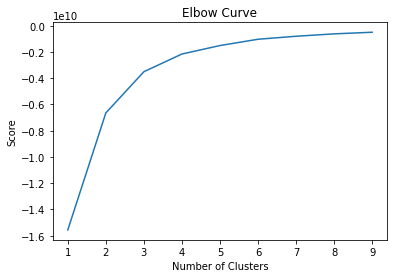

In [159]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [160]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [161]:
# Fit the k-means object to the data.

kmeans.fit(df_yrb)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [162]:
df_yrb['clusters'] = kmeans.fit_predict(df_yrb)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [163]:
df_yrb['clusters'].value_counts()

0    2846
1    1702
2     233
Name: clusters, dtype: int64

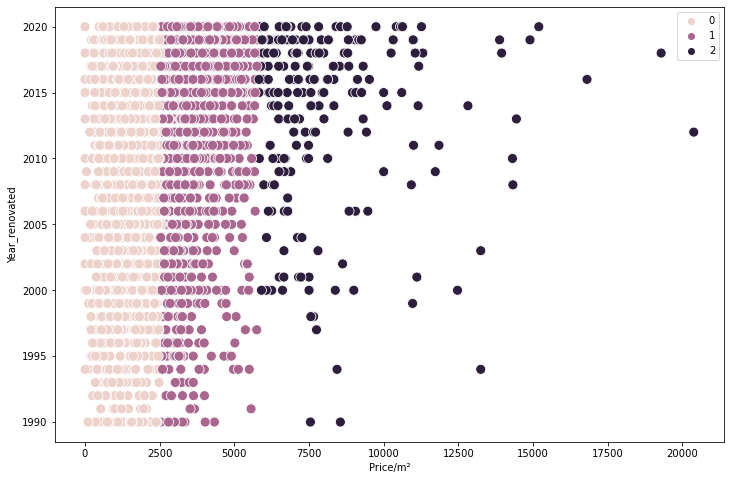

In [164]:
# Plot the clusters for the "Price/m²" and "Year_renovated" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_yrb['Price/m²'], y=df_yrb['Year_renovated'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price/m²') # Label x-axis.
plt.ylabel('Year_renovated') # Label y-axis.
plt.show()

In [165]:
df_yrb.groupby('clusters').agg
    'Price/m²':['mean','median'],
    'Year_renovated':['mean','median'],
       
})

Price/m²              Year_renovated        
                 mean       median           mean  median
clusters                                                 
0         1461.638441  1471.303911    2010.715039  2014.0
1         3600.471607  3379.629630    2013.413631  2016.0
2         7954.636133  7261.410788    2013.721030  2016.0

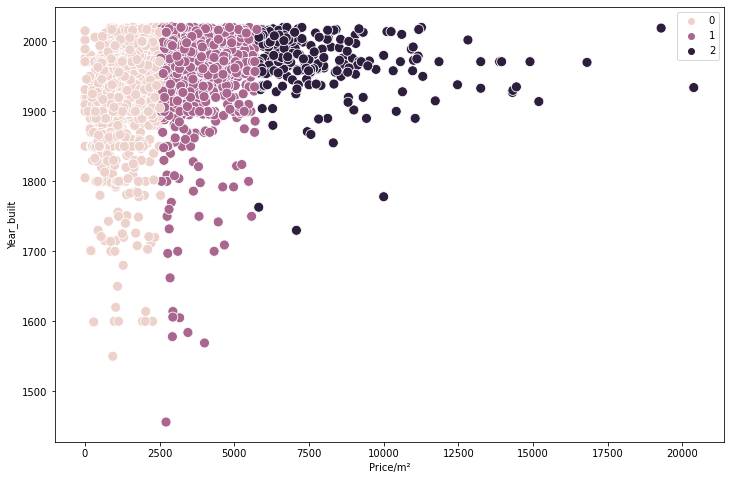

In [166]:
# Plot the clusters for the "Price/m²" and "Year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_yrb['Price/m²'], y=df_yrb['Year_built'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price/m²') # Label x-axis.
plt.ylabel('Year_built') # Label y-axis.
plt.show()

In [168]:
df_yrb.groupby('clusters').agg({
    'Price/m²':['mean','median'],
    'Year_built':['mean','median'],
    'Year_renovated':['mean','median']
       
})

Price/m²                Year_built         Year_renovated        
                 mean       median         mean  median           mean  median
clusters                                                                      
0         1461.638441  1471.303911  1943.841181  1959.5    2010.715039  2014.0
1         3600.471607  3379.629630  1964.347826  1971.0    2013.413631  2016.0
2         7954.636133  7261.410788  1969.613734  1972.0    2013.721030  2016.0

## 06d. K-Means comparison with houses that are not renovated

In [173]:
# subsetting df where there was no renovation
df_nr = df[df['Year_renovated'].isnull()==True]

In [174]:
df_nr

Price                  Type  Living_space     Lot  Usable_area  \
0       498000.0     Multiple dwelling        106.00   229.0         80.0   
1       495000.0     Mid-terrace house        140.93   517.0         20.0   
5      1400000.0     Mid-terrace house        310.00   860.0        100.0   
7       630000.0                Duplex        263.00   406.0        118.0   
11      470000.0                Duplex        268.00  1511.0         52.0   
...          ...                   ...           ...     ...          ...   
10520   185000.0     Mid-terrace house        114.00   650.0        114.0   
10523   140000.0  Residential property        161.00   287.0        204.0   
10531   339000.0                 Villa        287.00   624.0         69.0   
10533    35000.0             Farmhouse        200.00   371.0        400.0   
10534    35500.0      Special property         47.00  1400.0         80.0   

          Free_of_Relation  Rooms  Bedrooms  Bathrooms  Floors  Year_built  \
0              01.10.2020     5.5       3.0        1.0     2.0      2005.0   
1              01.01.2021     6.0       3.0        2.0     2.0      1994.0   
5                  sofort     8.0       4.0        2.0     3.0      1969.0   
7              01.04.2020    10.0       4.0        2.0     3.0      1989.0   
11                     NaN   12.0       9.0        3.0     3.0      1976.0   
...                    ...    ...       ...        ...     ...         ...   
10520   nach Vereinbarung     4.0       3.0        2.0     1.0      1991.0   
10523                  NaN    6.0       4.0        3.0     2.0      1800.0   
10531          01.09.2020     6.0       4.0        2.0     3.0      2000.0   
10533              sofort     8.0       4.0        2.0     3.0      1971.0   
10534              sofort     2.0       1.0        1.0     1.0      1985.0   

      Furnishing_quality  Year_renovated    Condition             Heating  \
0                 normal             NaN   modernized     central heating   
1                  basic             NaN   modernized       stove heating   
5                  basic             NaN   maintained                 NaN   
7                  basic             NaN   modernized       stove heating   
11                 basic             NaN   modernized       stove heating   
...                  ...             ...          ...                 ...   
10520              basic             NaN   modernized       stove heating   
10523             normal             NaN   modernized     central heating   
10531              luxus             NaN          NaN           heat pump   
10533            refined             NaN  refurbished  underfloor heating   
10534            refined             NaN   maintained     central heating   

      Energy_source        Energy_certificate  Energy_certificate_type  \
0              Gas                  available       demand certificate   
1               NaN       not required by law                      NaN   
5               Öl                  available  consumption certificate   
7              Gas                  available       demand certificate   
11              Öl                  available       demand certificate   
...             ...                       ...                      ...   
10520          Gas                  available  consumption certificate   
10523          Gas   available for inspection                      NaN   
10531   Flüssiggas                  available  consumption certificate   
10533         Holz                        NaN                      NaN   
10534          Gas   available for inspection                      NaN   

      Energy_efficiency_class              State                         City  \
0                          D   Baden-Württemberg                Bodenseekreis   
1                         NaN  Baden-Württemberg             Konstanz (Kreis)   
5                         NaN  Baden-Württemberg                    Stuttgart   
7          

In [178]:
# Dropping all variables but year_renovated 
df_nr2 = df_nr.drop (columns = ['Price','Type','Living_space','Lot','Usable_area','Free_of_Relation','Rooms','Bedrooms','Bathrooms','Floors','Furnishing_quality','Condition','Heating','Energy_source','Energy_certificate','Energy_certificate_type','Energy_efficiency_class','State','City','Place','Garages','furnish_dummy','condition_dummy','energy_dummy','Garagetype;','type_dummy','Year_renovated'])

In [179]:
df_nr2

Year_built     Price/m²
0          2005.0  4698.113208
1          1994.0  3512.382034
5          1969.0  4516.129032
7          1989.0  2395.437262
11         1976.0  1753.731343
...           ...          ...
10520      1991.0  1622.807018
10523      1800.0   869.565217
10531      2000.0  1181.184669
10533      1971.0   175.000000
10534      1985.0   755.319149

[4859 rows x 2 columns]

In [187]:
df_nr2.isnull().sum()

Year_built    0
Price/m²      0
dtype: int64

In [185]:
# dropping the NaN
df_nr2 = df_nr2[df_nr2['Price/m²'].isnull()==False]

In [202]:
# dropping outlier
df_nr2 = df_nr2[df_nr2['Price/m²']<100000]

In [203]:
df_nr2

Year_built     Price/m²  clusters
0          2005.0  4698.113208         0
1          1994.0  3512.382034         0
5          1969.0  4516.129032         0
7          1989.0  2395.437262         0
11         1976.0  1753.731343         0
...           ...          ...       ...
10520      1991.0  1622.807018         0
10523      1800.0   869.565217         0
10531      2000.0  1181.184669         0
10533      1971.0   175.000000         0
10534      1985.0   755.319149         0

[4854 rows x 3 columns]

In [204]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_nr2)
print(scaled)

[[ 0.69732992  0.92690544  0.        ]
 [ 0.48329415  0.34083811  0.        ]
 [-0.00315077  0.83695674  0.        ]
 ...
 [ 0.60004094 -0.8113949   0.        ]
 [ 0.03576483 -1.30871838  0.        ]
 [ 0.30817398 -1.021886    0.        ]]


In [205]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [206]:
score = [kmeans[i].fit(df_nr2).score(df_nr2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-19881876565.555443,
 -9516495094.861448,
 -5291304367.574955,
 -3456932687.613745,
 -2271796617.063731,
 -1551114989.179735,
 -1177180948.8893983,
 -918579681.5104342,
 -734598658.8276314]

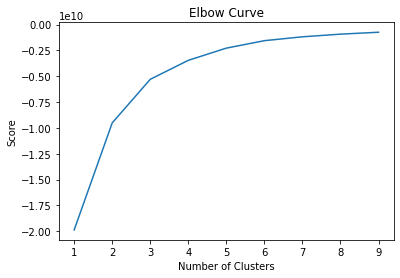

In [207]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [214]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [215]:
# Fit the k-means object to the data.

kmeans.fit(df_nr2)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [216]:
df_nr2['clusters'] = kmeans.fit_predict(df_nr2)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\lifti\AppData\Local\Temp/ipykernel_8516/2231696306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nr2['clusters'] = kmeans.fit_predict(df_nr2)


In [217]:
df_nr2['clusters'].value_counts()

1    2777
0    1885
2     192
Name: clusters, dtype: int64

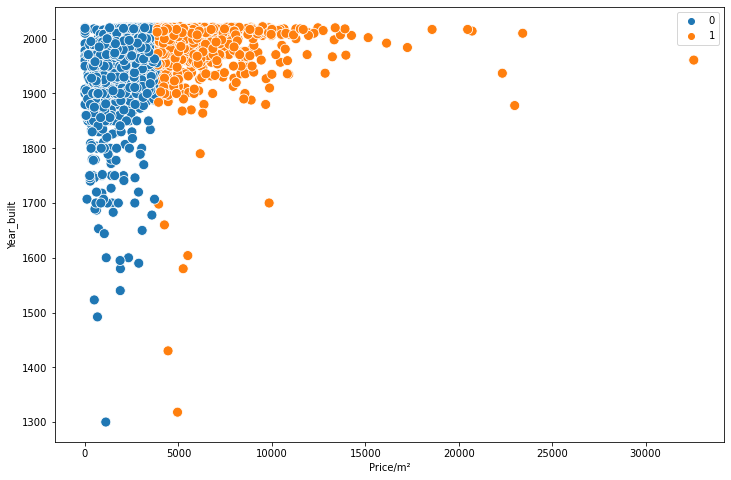

In [212]:
# Plot the clusters for the "Price/m²" and "Year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nr2['Price/m²'], y=df_nr2['Year_built'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price/m²') # Label x-axis.
plt.ylabel('Year_built') # Label y-axis.
plt.show()

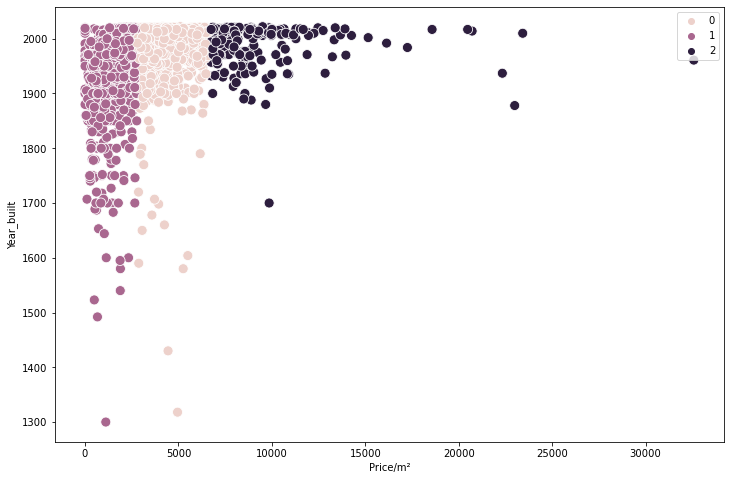

In [218]:
# Plot the clusters for the "Price/m²" and "Year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nr2['Price/m²'], y=df_nr2['Year_built'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price/m²') # Label x-axis.
plt.ylabel('Year_built') # Label y-axis.
plt.show()

In [213]:
df_nr2.groupby('clusters').agg({
    'Price/m²':['mean','median'],
    'Year_built':['mean','median'],
       
})

Price/m²                Year_built        
                 mean       median         mean  median
clusters                                               
0         2062.993412  2069.444444  1964.714211  1973.0
1         5633.268230  4858.108108  1985.613746  1998.0

In [219]:
df_nr2.groupby('clusters').agg({
    'Price/m²':['mean','median'],
    'Year_built':['mean','median'],
       
})

Price/m²                Year_built        
                 mean       median         mean  median
clusters                                               
0         3944.489847  3707.627119  1984.259947  1994.0
1         1611.186731  1657.046980  1957.652143  1971.0
2         9334.557274  8391.732918  1987.406250  2003.5

## 06e. K-means clustering with Type

## 06ea. K-means clustering with Farmhouse Price/m² -> Year_built

In [319]:
# Dropping all variables but Price/m² and Year_built 
df_F2 = df_Farmhouse.drop (columns = ['Price','Type','Living_space','Lot','Usable_area','Free_of_Relation','Rooms','Bedrooms','Bathrooms','Floors','Furnishing_quality','Condition','Heating','Energy_source','Energy_certificate','Energy_certificate_type','Energy_efficiency_class','State','City','Place','Garages','furnish_dummy','condition_dummy','energy_dummy','Garagetype;','type_dummy','Year_renovated'])

In [320]:
df_F2

Year_built     Price/m²
3          1900.0  1850.000000
25         1969.0  3739.130435
80         1970.0  3516.666667
99         1995.0  3308.823529
110        1987.0  4666.666667
...           ...          ...
10402      1971.0   876.623377
10456      1959.0   629.370629
10479      1800.0   179.104478
10533      1971.0   175.000000
10535      1900.0   345.454545

[544 rows x 2 columns]

In [321]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_F2)
print(scaled)

[[-1.55453435 -0.58118265]
 [ 0.04372913  0.54538134]
 [ 0.06689237  0.41271731]
 ...
 [-3.87085822 -1.57760444]
 [ 0.09005561 -1.5800521 ]
 [-1.55453435 -1.47840324]]


In [322]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [323]:
score = [kmeans[i].fit(df_F2).score(df_F2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[-1530730789.0325122,
 -624213760.5719295,
 -305061078.8377277,
 -196852087.50707233,
 -125661888.56148507,
 -87647957.2917051,
 -62605166.00773053,
 -48906254.71507541,
 -37557150.65392867]

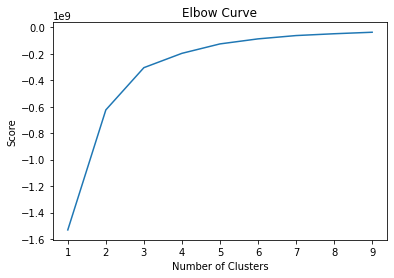

In [324]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [325]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [326]:
# Fit the k-means object to the data.

kmeans.fit(df_F2)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [327]:
df_F2['clusters'] = kmeans.fit_predict(df_F2)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [328]:
df_F2['clusters'].value_counts()

0    256
1    197
2     91
Name: clusters, dtype: int64

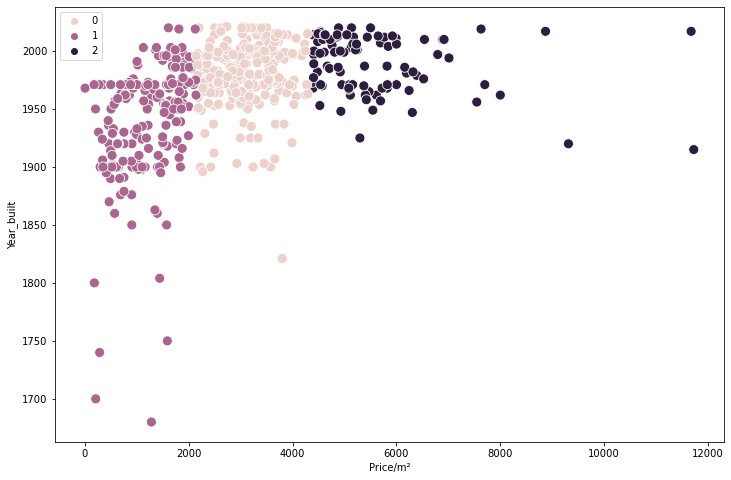

In [329]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_F2['Price/m²'], y=df_F2['Year_built'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price/m²') # Label x-axis.
plt.ylabel('Year_built') # Label y-axis.
plt.show()

In [331]:
df_F2.groupby('clusters').agg({
    'Price/m²':['count','mean','median'],
    'Year_built':['count','mean','median'],
       
})

Price/m²                           Year_built                     
            count         mean       median      count         mean  median
clusters                                                                   
0             256  3067.287564  3037.982724        256  1980.921875  1983.5
1             197  1223.283242  1222.222222        197  1939.401015  1953.0
2              91  5608.358231  5211.532625         91  1988.252747  1994.0

## 06eb. K-means clustering with Multiple Dwelling Price/m² -> Year_built

In [333]:
# Dropping all variables but Price/m² and Year_built 
df_M2 = df_multiple.drop (columns = ['Price','Type','Living_space','Lot','Usable_area','Free_of_Relation','Rooms','Bedrooms','Bathrooms','Floors','Furnishing_quality','Condition','Heating','Energy_source','Energy_certificate','Energy_certificate_type','Energy_efficiency_class','State','City','Place','Garages','furnish_dummy','condition_dummy','energy_dummy','Garagetype;','type_dummy','Year_renovated'])

In [334]:
df_M2

Year_built     Price/m²
0          2005.0  4698.113208
4          1968.0  4078.260870
39         1964.0  3564.356436
70         2003.0  6515.745175
291        1963.0  3139.651708
...           ...          ...
10304      2017.0  3875.000000
10342      1961.0  3943.699732
10426      1999.0  2269.230769
10453      1923.0   590.551181
10502      1994.0  2923.913043

[356 rows x 2 columns]

In [335]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_M2)
print(scaled)

[[ 9.11720610e-01  9.20734073e-01]
 [-9.78787069e-02  5.79901646e-01]
 [-2.07024579e-01  2.97325805e-01]
 [ 8.57147674e-01  1.92017842e+00]
 [-2.34311047e-01  6.37973754e-02]
 [ 1.26644469e+00  3.13259062e-01]
 [ 4.20564185e-01  4.51962319e-01]
 [ 9.39007078e-01  6.55868770e-01]
 [ 1.47699505e-01 -1.45620029e-01]
 [-9.78787069e-02  5.46349428e-01]
 [-1.60193029e-02  2.77253154e-01]
 [ 8.57147674e-01  2.13830619e-03]
 [-3.16170451e-01 -1.86409206e-01]
 [ 8.02574738e-01  1.04090803e+00]
 [-3.16170451e-01  5.33708952e-01]
 [ 1.21187176e+00  1.44533454e+00]
 [-1.60193029e-02 -6.54445073e-01]
 [ 4.20564185e-01  1.98134435e+00]
 [ 4.47850653e-01 -4.32988890e-02]
 [ 1.47699505e-01  2.27572439e-01]
 [-4.52602791e-01 -1.08377293e+00]
 [ 3.65991249e-01  5.16978841e-02]
 [ 1.23915823e+00  8.69830614e-02]
 [ 2.29558909e-01 -9.98690431e-03]
 [-2.61597515e-01  1.38943580e-01]
 [ 9.93580014e-01  9.19997802e-01]
 [ 3.65991249e-01  8.20963755e-01]
 [ 5.02423589e-01  6.05783488e-01]
 [ 7.48001802e-01  1

In [336]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [337]:
score = [kmeans[i].fit(df_M2).score(df_M2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[-1177934095.342523,
 -467945260.52865565,
 -231963784.51615262,
 -134768425.21074262,
 -87143887.30366558,
 -56639371.464635134,
 -43507411.06969108,
 -32364732.030590527,
 -25558028.28887173]

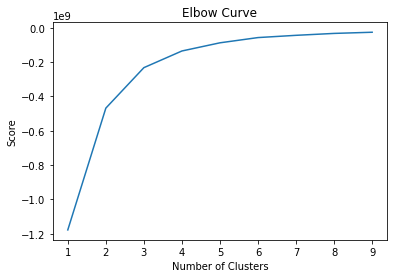

In [338]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [339]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [340]:
# Fit the k-means object to the data.

kmeans.fit(df_M2)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [341]:
df_M2['clusters'] = kmeans.fit_predict(df_M2)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [342]:
df_M2['clusters'].value_counts()

0    167
2    156
1     33
Name: clusters, dtype: int64

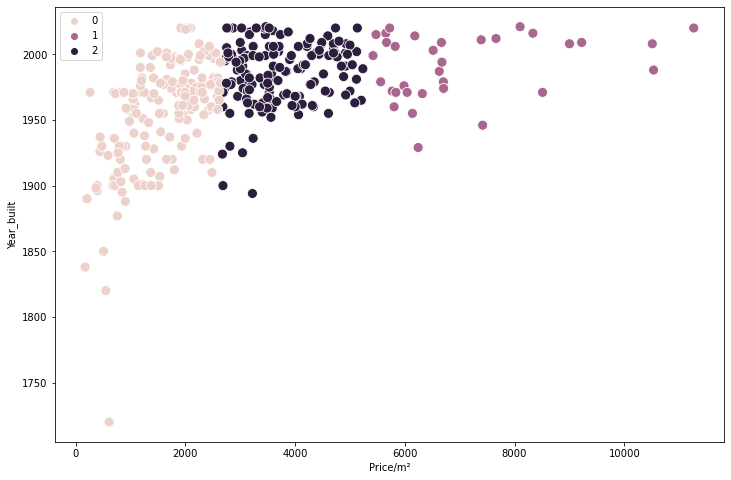

In [343]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_M2['Price/m²'], y=df_M2['Year_built'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price/m²') # Label x-axis.
plt.ylabel('Year_built') # Label y-axis.
plt.show()

In [344]:
df_M2.groupby('clusters').agg({
    'Price/m²':['count','mean','median'],
    'Year_built':['count','mean','median'],
       
})

Price/m²                           Year_built                     
            count         mean       median      count         mean  median
clusters                                                                   
0             167  1586.190814  1662.500000        167  1954.742515  1966.0
1              33  7014.356345  6515.745175         33  1991.454545  1999.0
2             156  3718.228324  3562.178218        156  1985.416667  1989.0